In [ ]:
# 23andMe data analysis 

# 1. Venn diagram variant overlap

In [ ]:
# Generate Venn diagram to check which way to approach manuscript style
# file locations are all in cd /data/CARD/projects/23andme_annotation/Rare_variant_project_VP/
# Overview
## 0. Setup
## 1. Venn diagram all data
## 2. Power calculations OR=2 and OR=3
## 3. Manuscript tables and plots
## 4. How many variants enough power and significant?
## 5. How many variants enough power but not significant?

In [2]:
## Setup
library(data.table)
library(tidyverse)
library(ggvenn)
library(ggplot2)
library(gridExtra)
library(genpwr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()

Loading required package: grid


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [3]:
### Read in files

andme = fread("toMETA_23andme_summary.txt")
dim(andme)
head(andme)
AMP = fread("toMETA_SCORE_AMP.txt")
dim(AMP)
UKB = fread("toMETA_SCORE_UKBALL.txt")
dim(UKB)

[1] 703   8

CHR.BP,REF,ALT,FREQ,effect,stderr,pvalue,N_INFORMATIVE
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
chr1:155235057,C,T,6.809994e-07,0.000000,0.0000000,NA,3090507
chr1:155235195,C,T,7.029013e-06,1.276524,1.0522402,3.141778e-01,3090507
chr1:155235196,G,A,1.992936e-04,1.262212,0.1990237,8.495697e-08,3090507
chr1:155235231,T,C,6.583656e-07,-1.009280,17.4340750,9.104737e-01,3090507
chr1:155235699,T,C,3.573330e-06,0.000000,0.0000000,NA,3090507
chr1:155235704,C,T,1.787393e-06,0.000000,0.0000000,NA,3090507


[1] 256  12

[1] 608  12

In [91]:
head(AMP)
head(UKB)

CHR.BP,REF,ALT,N_INFORMATIVE,AF,U,V,STAT,DIRECTION,EFFECT,SE,PVALUE,minorAllele,majorAllele
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
chr1:7985019,G,A,4007,0.000748690,1.2119400,1.238870,1.18561000,+,0.9782700,0.898438,0.276217,A,G
chr1:16985990,C,T,4007,0.000748690,-1.0842400,1.312970,0.89535700,-,-0.8257940,0.872717,0.344030,T,C
chr1:16986065,C,T,4007,0.000374345,0.0300306,0.648305,0.00139107,+,0.0463217,1.241970,0.970248,T,C
chr1:16986091,G,A,4007,0.004117790,-1.4693400,7.544140,0.28617800,-,-0.1947660,0.364079,0.592680,A,G
chr1:16986097,G,A,4007,0.050411800,-1.6788300,84.775500,0.03324630,-,-0.0198033,0.108609,0.855319,A,G
chr1:16986101,T,A,4007,0.005490390,-1.4129400,9.165150,0.21782500,-,-0.1541650,0.330317,0.640702,A,T


CHR.BP,REF,ALT,N_INFORMATIVE,AF,U,V,STAT,DIRECTION,EFFECT,SE,PVALUE,minorAllele,majorAllele
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
chr1:7965399,G,A,45857,0.00000e+00,NA,NA,NA,NA,NA,NA,NA,A,G
chr1:7984930,A,C,45857,0.00000e+00,NA,NA,NA,NA,NA,NA,NA,C,A
chr1:7984971,G,A,45857,0.00000e+00,NA,NA,NA,NA,NA,NA,NA,A,G
chr1:7985019,G,A,45857,4.03428e-04,1.65211,3.816730,0.715137,+,0.432862,0.511864,0.3977440,A,G
chr1:16985990,C,T,45857,9.81311e-05,1.75147,0.977177,3.139310,+,1.792380,1.011610,0.0764263,T,C
chr1:16986065,C,T,45857,2.18069e-04,-2.18282,2.374070,2.006990,-,-0.919445,0.649013,0.1565760,T,C


In [4]:
## 1. Quality control to remove missing stats

### 1.1. 23andMe
andme1 = andme %>% filter(!is.na(pvalue)) %>% select(CHR.BP) %>% dplyr::rename("Marker" = CHR.BP)
andme1$Marker_23andMe = andme1$Marker
dim(andme1)

### 1.2. AMP-PD
AMP1 = AMP %>% filter(!is.na(PVALUE)) %>% select(`CHR.BP`) %>% dplyr::rename("Marker" = `CHR.BP`)
AMP1$Marker_AMPPD = AMP1$Marker
dim(AMP1)

### 1.3. UKB
UKB1 = UKB %>% filter(!is.na(PVALUE)) %>% select(`CHR.BP`) %>% dplyr::rename("Marker" = `CHR.BP`)
UKB1$Marker_UKB = UKB1$Marker
dim(UKB1)


[1] 656   2

[1] 256   2

[1] 408   2

In [93]:
### 1.4. Join data together

data = full_join(andme1, UKB1)
data1 = full_join(data, AMP1)
 
x = list(
`23andMe` = andme1$Marker_23andMe,
UKB = UKB1$Marker_UKB,
`AMP-PD` = AMP1$Marker_AMPPD)


Joining, by = "Marker"
Joining, by = "Marker"


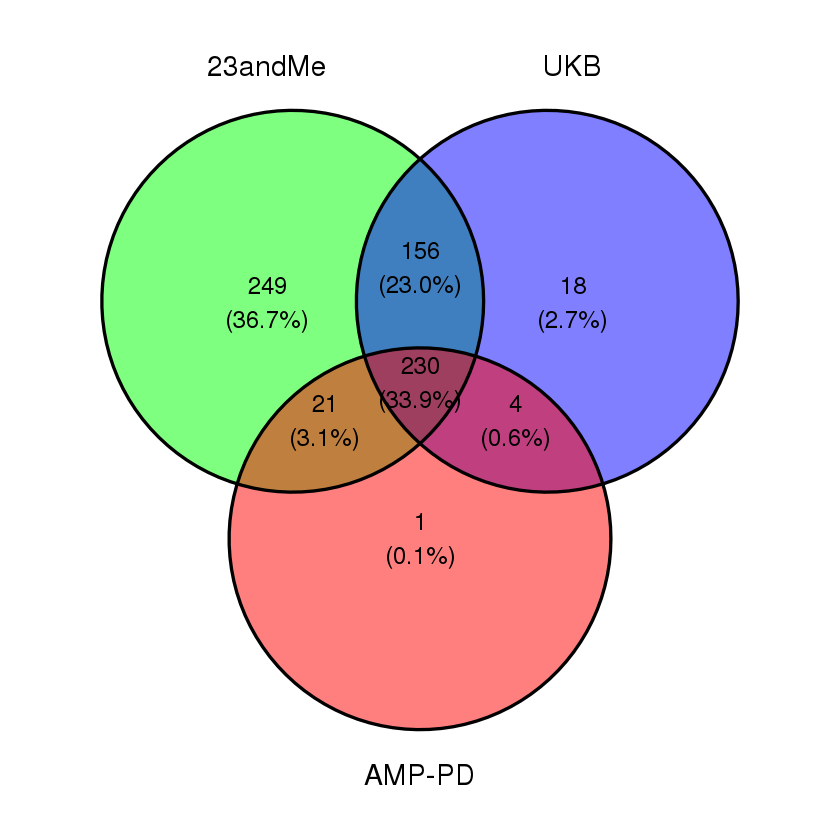

In [94]:
### 1.5. Make diagram

Venn_supp = ggvenn(
  x, columns = c("23andMe", "UKB", "AMP-PD"),
  fill_color = c("green", "blue", "red"),
  stroke_size = 0.7,
  text_size = 5
  )

Venn_supp

#ggsave("./Plots_Manuscript/Venn_diagram_all_datasets.png", Venn_supp, width = 10, height = 10, dpi=300, units = "in")
# that means n=249 variants are uniquely contributed by 23andMe only - i.e. manuscript story line should focus on 23andMe only, then add meta-analysis of both data sets


# 2. Power calculation per variant
as suggested by Karl Heilbron

## 2.1 Data preparation

In [ ]:
## Taking all cases from 23andMe variant file, accounting for proxies which count 1/4 of a case:
# n_cases = 31156.25 = 31156
# n_controls = 3,108,134
# BUT using the conservative approach as suggested by Mike Nalls:
# n_cases = 25,034
# n_controls = 100,000

In [5]:
# Read in 23andMe variant file (n=834), whcih was annotated for gnomad frequencies (non-finnish european, NFE) and amino acid changes
freq = fread("23andMe_834variants_annotated_and_stats.txt")
colnames(freq)

freq1 = freq %>% separate('CHR.BP.REF.ALT', c("Chr", "Start", "ALT", "REF"), sep = ":") %>% select(Chr, Start, VariantName, REF, ALT, AF_nfe, effect) %>% dplyr::rename("Gnomad_NFE" = AF_nfe, "Effect_meta3" = effect)
freq1$OR_meta3 = exp(freq1$Effect_meta3)

freq1 %>% filter(Gnomad_NFE == ".") %>% tally()
freq1 %>% filter(Gnomad_NFE == ".") %>% head()
# note: there are some variants that don't have a NFE frequency but that's okay, can combine with 23andMe frequencies

[1] "CHR.BP"             "REF"                "ALT"               
 [4] "position"           "Gene"               "assay.name"        
 [7] "ExonicFunc.refGene" "VariantName"        "CLNDN"             
[10] "CLNREVSTAT"         "CLNSIG"             "scaffold"          
[13] "alleles"            "pvalue"             "pval.unadj"        
[16] "effect"             "stderr"             "pass"              
[19] "src"                "dose.b"             "AA.0"              
[22] "AB.0"               "BB.0"               "im.num.0"          
[25] "dose.b.0"           "AA.1"               "AB.1"              
[28] "BB.1"               "dose.b.1"           "im.num.1"          
[31] "is.v1"              "is.v2"              "is.v3"             
[34] "is.v4"              "is.v5"              "gt.rate"           
[37] "hw.p.value"         "p.date"             "freq.b"            
[40] "avg.rsqr"           "min.rsqr"           "p.batch"           
[43] "N_controls"         "N_cases"            "N_INFORMATIVE"     
[46] "MarkerName"         "alternative_allele" "effect_allele"

ERROR: [1m[33mError[39m in `chr_as_locations()`:[22m
[33m![39m Can't rename columns that don't exist.
[31m✖[39m Column `AF_nfe` doesn't exist.


In [51]:
# add 23andMe frequencies too
andme_old = fread("results_combined_23andMe.txt")

In [52]:
# fix frequencies - 23andme format is always weird
## how many imputed vs genotyped?
andme_old %>% group_by(src) %>% tally()

src,n
<chr>,<int>
G,367
I,596


In [53]:
## how many missing freq.b?
andme_old %>% filter(is.na(freq.b)) %>% tally()

n
<int>
460


In [54]:
## correct those imputed ones with missing freq.b
andme_old$MAF_23 = andme_old$freq.b
andme_old_edit = andme_old %>% mutate(MAF_23 = if_else(src == "I" & is.na(freq.b), dose.b, MAF_23)) %>% dplyr::rename("Chr" = scaffold, "Start" = position)
andme_old_edit = andme_old_edit %>% select(Chr, Start, src, dose.b, freq.b, MAF_23,effect)

In [55]:
# join 23andMe frequencies onto file
andme_old_edit$Start = as.character(andme_old_edit$Start)
all_freq = left_join(freq1, andme_old_edit)

Joining, by = c("Chr", "Start")


In [56]:
# add 23andMe effect and OR
all_freq1 = all_freq %>% dplyr::rename("effect_23andMe" =effect)
all_freq1$OR_23andMe = exp(all_freq1$effect_23andMe)

In [57]:
# how many missing frequencies in 23andMe?
dim(all_freq1)
all_freq1 %>% filter(is.na(MAF_23)) %>% tally() #81

[1] 834  14

n
<int>
81


In [58]:
# check if we always have either gnomad or 23andMe frequency (this is not MAF, general allele freq) for all of them
all_freq1 %>% filter(is.na(Gnomad_NFE) & is.na(MAF_23)) %>% tally() # yes!

n
<int>
0


In [59]:
# how many do we now still have missing frequencies for?
all_freq1 %>% filter(Gnomad_NFE == ".") %>% tally() #348
all_freq1 %>% filter(is.na(MAF_23)) %>% tally() #81

n
<int>
348


n
<int>
81


In [60]:
# FLip alleles, i.e. those >0.5, apply 1-freq
## flip 23andMe frequencies
all_freq2 = all_freq1 %>% mutate(MAF_23_flip = if_else(MAF_23>0.50, 1-MAF_23, MAF_23))

all_freq2$MAF_NFE = as.character(all_freq2$MAF_NFE)
all_freq2$MAF_NFE = as.numeric(all_freq2$MAF_NFE)
all_freq2$Gnomad_NFE = as.numeric(all_freq2$Gnomad_NFE)

## flip Gnomad frequencies
all_freq2 = all_freq2 %>% mutate(MAF_NFE_flip = if_else(Gnomad_NFE> 0.50, 1-Gnomad_NFE, Gnomad_NFE))
all_freq3 = all_freq2 %>% select(Chr, Start, VariantName, MAF_23_flip, MAF_NFE_flip, Effect_meta3, effect_23andMe, OR_meta3, OR_23andMe) %>% dplyr::rename("MAF_23" = MAF_23_flip, "MAF_NFE" = MAF_NFE_flip)
# some NA's introduced but all normal


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [61]:
# Derive number of variants with Gnomad frequencies:
all_freq3 %>% mutate(Freq_groups = ifelse(MAF_NFE <0.0001, 0.0001,
                                           ifelse(MAF_NFE >= 0.0001 & MAF_NFE <0.0005, 0.0005,
                                                   ifelse(MAF_NFE>=0.0005 & MAF_NFE < 0.001, 0.001,
                                                           ifelse(MAF_NFE>=0.001 & MAF_NFE < 0.005, 0.005,
                                                                   ifelse(MAF_NFE>=0.005 & MAF_NFE <0.01, 0.01,
                                                                          ifelse(MAF_NFE >= 0.01 & MAF_NFE < 0.05, 0.05,
                                                                                  ifelse(MAF_NFE >= 0.05, "over 0.05", "")))))))) %>% group_by(Freq_groups) %>% tally()


Freq_groups,n
<chr>,<int>
0.001,45
0.005,53
0.01,10
0.05,18
1e-04,230
5e-04,118
over 0.05,12
NA,348


In [62]:
# Derive number of variants with 23andMe frequencies:
all_freq3 %>% mutate(Freq_groups = ifelse(MAF_23 <0.0001, 0.0001,
                                           ifelse(MAF_23 >= 0.0001 & MAF_23 <0.0005, 0.0005,
                                                   ifelse(MAF_23>=0.0005 & MAF_23 < 0.001, 0.001,
                                                           ifelse(MAF_23>=0.001 & MAF_23 < 0.005, 0.005,
                                                                   ifelse(MAF_23>=0.005 & MAF_23 <0.01, 0.01,
                                                                          ifelse(MAF_23 >= 0.01 & MAF_23 < 0.05, 0.05,
                                                                                  ifelse(MAF_23 >= 0.05, "over 0.05", "")))))))) %>% group_by(Freq_groups) %>% tally()

## note: not many differences between Gnomad and 23andMe, other than that 23andMe has more freq available in data! Note that frequencies here aren't necessarily MAF, 
## that's why it's okay to have some > 0.001


Freq_groups,n
<chr>,<int>
0.001,47
0.005,50
0.01,14
0.05,17
1e-04,483
5e-04,130
over 0.05,12
NA,81


In [63]:
all_freq3 %>% filter(is.na(MAF_23) & is.na(MAF_NFE)) %>% tally()

n
<int>
46


In [64]:
# Now run the power calculations on all variants, for missing 23andMe variants, use Gnomad
all_freq4 = all_freq3 
all_freq4$allfreq = all_freq4$MAF_23

# for all those where allfreq is NA, replace with MAF_NFE values
all_freq4 = all_freq4 %>% mutate(allfreq = coalesce(allfreq,MAF_NFE))

# check if this has worked
dim(all_freq4)
all_freq4 %>% filter(is.na(allfreq)) %>% tally() #46 with no frequency in either 23andMe or Gnomad
all_freq4 %>% filter(is.na(allfreq))

# check whole file
head(all_freq4)
81-46

[1] 834  10

n
<int>
46


Chr,Start,VariantName,MAF_23,MAF_NFE,Effect_meta3,effect_23andMe,OR_meta3,OR_23andMe,allfreq
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,155235024,GBA_I528V,NA,NA,0,0,1,1,NA
chr1,155240072,GBA_R41C,NA,NA,0,0,1,1,NA
chr1,16986235,ATP13A2_R1076Q,NA,NA,0,0,1,1,NA
chr1,16987089,ATP13A2_G970S,NA,NA,0,0,1,1,NA
chr1,16996098,ATP13A2_P469A,NA,NA,0,0,1,1,NA
chr1,16996118,ATP13A2_V462E,NA,NA,0,0,1,1,NA
chr1,16996484,ATP13A2_A398E,NA,NA,0,0,1,1,NA
chr1,20638103,PINK1_A217T,NA,NA,0,0,1,1,NA
chr1,20644540,PINK1_R276Q,NA,NA,0,0,1,1,NA


Chr,Start,VariantName,MAF_23,MAF_NFE,Effect_meta3,effect_23andMe,OR_meta3,OR_23andMe,allfreq
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,155235024,GBA_I528V,NA,NA,0.000000,0.000000,1.0000000,1.0000000,NA
chr1,155235057,GBA_G517S,6.809994e-07,NA,0.000000,0.000000,1.0000000,1.0000000,6.809994e-07
chr1,155235195,GBA_R502H,7.029013e-06,NA,1.276524,1.276524,3.5841593,3.5841593,7.029013e-06
chr1,155235196,GBA_R502C,1.992936e-04,0,-1.262212,-1.262212,0.2830274,0.2830274,1.992936e-04
chr1,155235197,GBA_N501K,3.618504e-06,NA,NA,1.006559,NA,2.7361701,3.618504e-06
chr1,155235231,GBA_H490R,6.583656e-07,NA,1.009280,1.009280,2.7436261,2.7436261,6.583656e-07


[1] 35

In [65]:
dim(all_freq4)

[1] 834  10

In [66]:
# plot Gnomad_NFE vs 23andMe frequencies
all_freq4 %>% filter(is.na(MAF_NFE)) %>% tally()
834-348 #486 variants have both frequencies available

n
<int>
348


[1] 486

In [67]:
# how many only 23andMe
all_freq4 %>% filter(!is.na(MAF_23) & is.na(MAF_NFE)) %>% tally()

n
<int>
302


In [68]:
# how many only NFE in gnomAD?
all_freq4 %>% filter(is.na(MAF_23) & !is.na(MAF_NFE)) %>% tally()

n
<int>
35


In [69]:
all_freq4 %>% filter(!is.na(allfreq)) %>% tally()
all_freq4 %>% filter(!is.na(allfreq)) %>% group_by(!is.na(MAF_23) & is.na(MAF_NFE)) %>% tally()
all_freq4 %>% filter(!is.na(allfreq)) %>% group_by(!is.na(MAF_NFE) & is.na(MAF_23)) %>% tally()
all_freq4 %>% filter(!is.na(MAF_23) & !is.na(MAF_NFE)) %>% tally()

n
<int>
788


!is.na(MAF_23) & is.na(MAF_NFE),n
<lgl>,<int>
FALSE,486
TRUE,302


!is.na(MAF_NFE) & is.na(MAF_23),n
<lgl>,<int>
FALSE,753
TRUE,35


n
<int>
451


## 2.2 Plotting frequencies

Warning message:
“Removed 383 rows containing missing values (geom_point).”


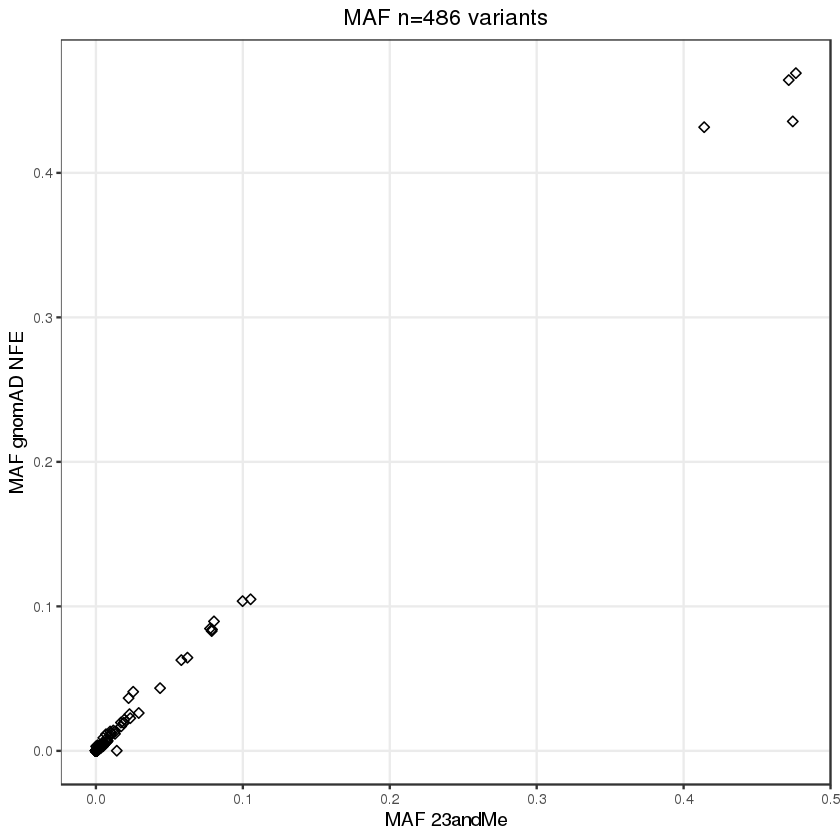

In [70]:
# plot normal frequencies
freqPlot = ggplot(all_freq4, aes(x=MAF_23, y=MAF_NFE)) +
geom_point(size=2, shape=23)+
theme_bw()+
theme(panel.grid.minor = element_blank()) +
  ylab("MAF gnomAD NFE")+
  xlab("MAF 23andMe")+
  ggtitle("MAF n=486 variants")+
  theme(plot.title = element_text(hjust=0.5))

#ggsave("./Plots_Manuscript/Scatter_plot_frequencies_23andMe_vs_meta.png", freqPlot, width = 10, height = 6, dpi=300, units = "in")

freqPlot

Warning message:
“Removed 383 rows containing missing values (geom_point).”


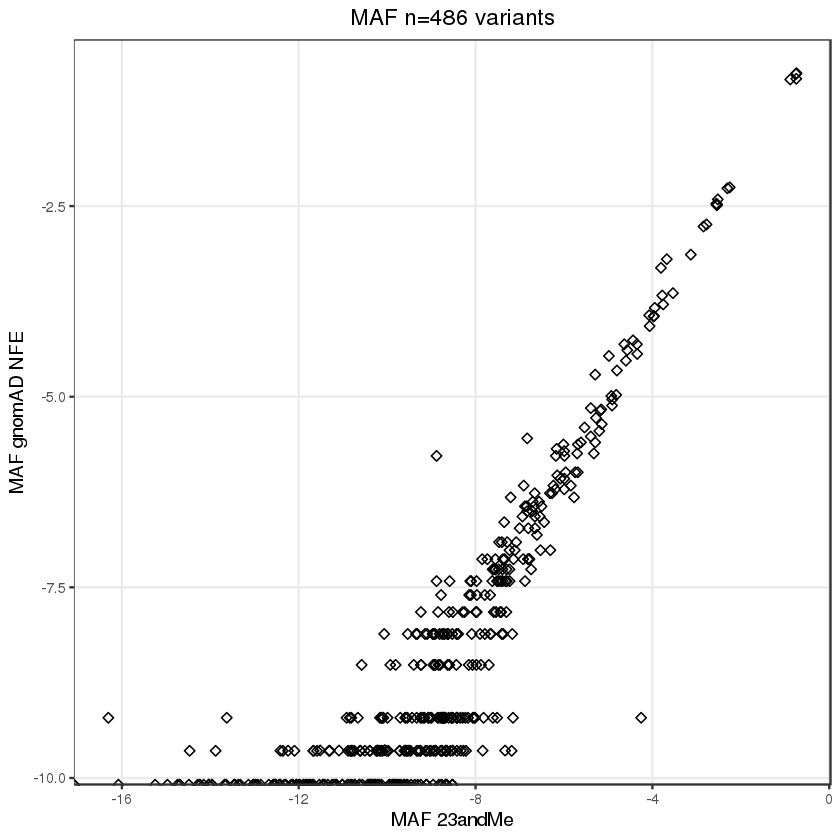

In [71]:
# plot log frequencies
freqPlot_log = ggplot(all_freq4, aes(x=log(MAF_23), y=log(MAF_NFE))) +
geom_point(size=2, shape=23)+
theme_bw()+
theme(panel.grid.minor = element_blank()) +
  ylab("MAF gnomAD NFE")+
  xlab("MAF 23andMe")+
  ggtitle("MAF n=486 variants")+
  theme(plot.title = element_text(hjust=0.5))

# ggsave("./Plots_Manuscript/Scatter_plot_frequencies_23andMe_vs_meta_log.png", freqPlot_log, width = 10, height = 6, dpi=300, units = "in")

freqPlot_log

In [72]:
# plot higher frequencies
all_freq4 %>% filter(MAF_NFE >0.2) %>% tally()
all_freq4 %>% filter(MAF_NFE >0.2) 

# frequencies look very similar but are so small that differences are hard to visualize

n
<int>
4


Chr,Start,VariantName,MAF_23,MAF_NFE,Effect_meta3,effect_23andMe,OR_meta3,OR_23andMe,allfreq
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,16986248,ATP13A2_A1072T,0.4764040,0.4690,0.03514549,0.03514549,1.0357704,1.0357704,0.4764040
chr15,61910283,VPS13C_S2913N,0.4742973,0.4356,0.01166557,0.01166557,1.0117339,1.0117339,0.4742973
chr15,61967438,VPS13C_R974K,0.4139909,0.4316,-0.01312346,-0.01312346,0.9869623,0.9869623,0.4139909
chr3,132499779,DNAJC13_A1463S,0.4715526,0.4642,-0.01679873,-0.01679873,0.9833416,0.9833416,0.4715526


[1] 230  10

Warning message:
“Removed 32 rows containing missing values (geom_point).”


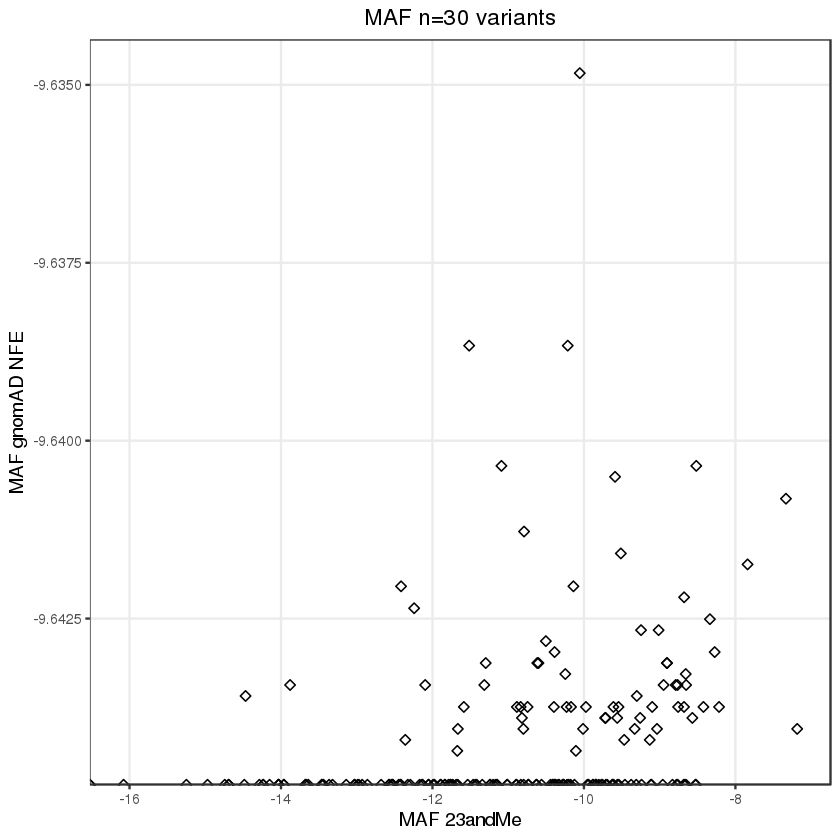

In [73]:
# check if gnomAD freq are all the same as from the log plot?
all_freq4 = fread("834_variants_AAchange_frequencies.txt")
test = all_freq4 %>% filter(log(MAF_NFE) < -9.5) 
dim(test)

ggplot(test, aes(x=log(MAF_23), y=log(MAF_NFE))) +
geom_point(size=2, shape=23)+
theme_bw()+
theme(panel.grid.minor = element_blank()) +
  ylab("MAF gnomAD NFE")+
  xlab("MAF 23andMe")+
  ggtitle("MAF n=30 variants")+
  theme(plot.title = element_text(hjust=0.5))
# looks like the variants are just so small, that they occur as a line on the bigger plots but MAFs are actually different

In [22]:
all_freq4 %>% filter(allfreq > 1e-9) %>% tally()

n
<int>
748


In [24]:
all_freq4 %>% filter(is.na(allfreq)) %>% tally()

n
<int>
46


## 2.3 Actual calculations

### 2.3.1 OR = 1.5

#### 2.3.1.1 Check for missing values 

In [3]:
OR1 = fread("Variants_with_power_at_OR1.5.txt")
dim(OR1)
OR1 %>% filter(!is.na(Power_at_alpha005_OR1.5)) %>% tally()
OR1 %>% filter(!is.na(Power_at_alpha005_OR1.5)) %>% summarise(min =min(allfreq, na.rm = T),
                  max = max(allfreq, na.rm = T))

OR1 %>% filter(is.na(Power_at_alpha005_OR1.5))%>% arrange(allfreq)
OR1 %>% filter(!is.na(Power_at_alpha005_OR1.5)) %>% arrange(allfreq) %>% head()

## it doesn't make sense why 4 variants shouldn't have power calculated! There doesn't seem to be a freq cut-off and we're not reading in any other statistics, other than the MAF


[1] 748  11

n
<int>
748


min,max
<dbl>,<dbl>
8.277818e-08,0.476404


Chr,Start,VariantName,MAF_23,MAF_NFE,Effect_meta3,Effect_23andMe,OR_meta3,OR_23andMe,allfreq,Power_at_alpha005_OR1.5
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


Chr,Start,VariantName,MAF_23,MAF_NFE,Effect_meta3,Effect_23andMe,OR_meta3,OR_23andMe,allfreq,Power_at_alpha005_OR1.5
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,155237458,GBA_H294Q,8.277818e-08,1e-04,-0.1392236,-0.1392236,0.8700334,0.8700334,8.277818e-08,0.05002650
chr22,38135061,PLA2G6_M274R,1.039999e-07,NA,-1.0005278,-1.0005278,0.3676853,0.3676853,1.039999e-07,0.05006556
chr15,89323403,NA,1.040129e-07,NA,0.0000000,0.0000000,1.0000000,1.0000000,1.040129e-07,0.05004739
chr1,20639911,PINK1_A232V,1.040562e-07,0e+00,-1.0007120,-1.0007120,0.3676176,0.3676176,1.040562e-07,0.05006438
chr16,46671766,VPS35_Q488R,1.040670e-07,NA,1.0048445,1.0048445,2.7314825,2.7314825,1.040670e-07,0.05006687
chr22,38143236,PLA2G6_C160R,2.080370e-07,NA,0.0000000,0.0000000,1.0000000,1.0000000,2.080370e-07,0.05012954


#### 2.3.1.2 Calculate manually for missing values 

In [160]:
# calculate the few missing ones manually

## GBA_H294Q
genpwr.calc(calc = "power", model = "logistic", ge.interaction = NULL,
   N=125000, Case.Rate=0.2,
   MAF=8.277818e-08, OR=c(1.5),Alpha=0.05,
   True.Model=c("Additive"), 
   Test.Model=c("Additive"))

## PLA2G6_M274R
genpwr.calc(calc = "power", model = "logistic", ge.interaction = NULL,
   N=125000, Case.Rate=0.2,k=NULL,
   MAF=1.039999e-07, OR=c(1.5),Alpha=0.05,
   True.Model=c("Additive"), 
   Test.Model=c("Additive"))

## chr15:89323403
genpwr.calc(calc = "power", model = "logistic", ge.interaction = NULL,
   N=125000, Case.Rate=0.2,k=NULL,
   MAF=1.040129e-07, OR=c(1.5),Alpha=0.05,
   True.Model=c("Additive"), 
   Test.Model=c("Additive"))

## POLG_W1041X
genpwr.calc(calc = "power", model = "logistic", ge.interaction = NULL,
   N=125000, Case.Rate=0.2,k=NULL,
   MAF=3.280261e-07, OR=c(1.5),Alpha=0.05,
   True.Model=c("Additive"), 
   Test.Model=c("Additive"))

Test.Model,True.Model,MAF,OR,N_total,N_cases,N_controls,Case.Rate,Power_at_Alpha_0.05
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Additive,Additive,8.277818e-08,1.5,125000,25000,1e+05,0.2,0.0500265


Test.Model,True.Model,MAF,OR,N_total,N_cases,N_controls,Case.Rate,Power_at_Alpha_0.05
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Additive,Additive,1.039999e-07,1.5,125000,25000,1e+05,0.2,0.05006556


Test.Model,True.Model,MAF,OR,N_total,N_cases,N_controls,Case.Rate,Power_at_Alpha_0.05
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Additive,Additive,1.040129e-07,1.5,125000,25000,1e+05,0.2,0.05004739


Test.Model,True.Model,MAF,OR,N_total,N_cases,N_controls,Case.Rate,Power_at_Alpha_0.05
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Additive,Additive,3.280261e-07,1.5,125000,25000,1e+05,0.2,0.05018096


#### 2.3.1.3 Fix in file

In [167]:
# add them to the file and save it
OR1$Power_at_alpha005_OR1.5[OR1$VariantName == "GBA_H294Q"] <- 0.0500265
OR1$Power_at_alpha005_OR1.5[OR1$VariantName == "PLA2G6_M274R"] <- 0.05006556
OR1$Power_at_alpha005_OR1.5[OR1$Start == 89323403] <- 0.05004739
OR1$Power_at_alpha005_OR1.5[OR1$VariantName == "POLG_W1041X"] <- 0.05018096

OR1 %>% filter(is.na(Power_at_alpha005_OR1.5))%>% arrange(allfreq) # empty and that's good

# write into new file
#write.table(OR1, "Variants_with_power_at_OR1.5.txt", row.names =F, sep="\t", quote =F)

Chr,Start,VariantName,MAF_23,MAF_NFE,Effect_meta3,Effect_23andMe,OR_meta3,OR_23andMe,allfreq,Power_at_alpha005_OR1.5
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


### 2.3.2 OR = 2

In [45]:
dim(results2)

[1] 748  11

#### 2.3.2.1 Check for missing values

In [4]:
OR2 = fread("Variants_with_power_at_OR2.txt")
OR2 %>% filter(!is.na(Power_at_alpha005_OR2)) %>% tally()
OR2 %>% filter(!is.na(Power_at_alpha005_OR2)) %>% summarise(min =min(allfreq, na.rm = T),
                  max = max(allfreq, na.rm = T))

OR2 %>% filter(is.na(Power_at_alpha005_OR2))%>% arrange(allfreq)
OR2 %>% filter(!is.na(Power_at_alpha005_OR2)) %>% arrange(allfreq) %>% head()


n
<int>
748


min,max
<dbl>,<dbl>
8.277818e-08,0.476404


Chr,Start,VariantName,MAF_23,MAF_NFE,Effect_meta3,Effect_23andMe,OR_meta3,OR_23andMe,allfreq,Power_at_alpha005_OR2
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


Chr,Start,VariantName,MAF_23,MAF_NFE,Effect_meta3,Effect_23andMe,OR_meta3,OR_23andMe,allfreq,Power_at_alpha005_OR2
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,155237458,GBA_H294Q,8.277818e-08,1e-04,-0.1392236,-0.1392236,0.8700334,0.8700334,8.277818e-08,0.05003568
chr22,38135061,PLA2G6_M274R,1.039999e-07,NA,-1.0005278,-1.0005278,0.3676853,0.3676853,1.039999e-07,0.05012705
chr15,89323403,NA,1.040129e-07,NA,0.0000000,0.0000000,1.0000000,1.0000000,1.040129e-07,0.05013207
chr1,20639911,PINK1_A232V,1.040562e-07,0e+00,-1.0007120,-1.0007120,0.3676176,0.3676176,1.040562e-07,0.05012316
chr16,46671766,VPS35_Q488R,1.040670e-07,NA,1.0048445,1.0048445,2.7314825,2.7314825,1.040670e-07,0.05017239
chr22,38143236,PLA2G6_C160R,2.080370e-07,NA,0.0000000,0.0000000,1.0000000,1.0000000,2.080370e-07,0.05010008


#### 2.3.2.2 Calculate manually for missing values

In [165]:
# calculate this one manually 

## POLG_W1041X
genpwr.calc(calc = "power", model = "logistic", ge.interaction = NULL,
   N=125000, Case.Rate=0.2,k=NULL,
   MAF=3.280474e-07, OR=c(2),Alpha=0.05,
   True.Model=c("Additive"), 
   Test.Model=c("Additive"))

Test.Model,True.Model,MAF,OR,N_total,N_cases,N_controls,Case.Rate,Power_at_Alpha_0.05
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Additive,Additive,3.280474e-07,2,125000,25000,1e+05,0.2,0.05033587


#### 2.3.2.3 Fix in file

In [5]:
# edit manually
OR2$Power_at_alpha005_OR2[OR2$VariantName =="POLG_W1041X"] <- 0.05033587
OR2 %>% filter(VariantName =="POLG_W1041X")
#write.table(OR2, "Variants_with_power_at_OR2.txt", quote = F, sep = "\t", row.names = F)

Chr,Start,VariantName,MAF_23,MAF_NFE,Effect_meta3,Effect_23andMe,OR_meta3,OR_23andMe,allfreq,Power_at_alpha005_OR2
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr15,89319081,POLG_W1041X,3.280261e-07,NA,NA,-2.055266,NA,0.1280588,3.280261e-07,0.05033587
chr15,89319082,POLG_W1041X,3.280474e-07,NA,NA,0.000000,NA,1.0000000,3.280474e-07,0.05033587


### 2.3.3 OR = 3

#### 2.3.3.1 Check for missing values

In [5]:
OR3 = fread("Variants_with_power_at_OR3.txt")
OR3 %>% filter(!is.na(Power_at_alpha005_OR3)) %>% tally()
OR3 %>% filter(!is.na(Power_at_alpha005_OR3)) %>% summarise(min =min(allfreq, na.rm = T),
                  max = max(allfreq, na.rm = T))

OR3 %>% filter(is.na(Power_at_alpha005_OR3))%>% arrange(allfreq) # there arent any NA's in here, since the file is so filtered
OR3 %>% filter(!is.na(Power_at_alpha005_OR3)) %>% arrange(allfreq) %>% head()

n
<int>
272


min,max
<dbl>,<dbl>
0.0001002772,0.476404


Chr,Start,VariantName,MAF_23,MAF_NFE,Effect_meta3,Effect_23andMe,OR_meta3,OR_23andMe,allfreq,Power_at_alpha005_OR3
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


Chr,Start,VariantName,MAF_23,MAF_NFE,Effect_meta3,Effect_23andMe,OR_meta3,OR_23andMe,allfreq,Power_at_alpha005_OR3
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr22,32493191,FBXO7_V352I,0.0001002772,NA,-0.33765075,-0.33765075,0.71344441,0.71344441,0.0001002772,0.7373456
chr1,155235727,GBA_D448H,0.0001031816,1.00e-04,0.23006021,0.23006021,1.25867579,1.25867579,0.0001031816,0.7493641
chr20,5069330,TMEM230_R81Q,0.0001057386,1.00e-04,-4.30654966,-4.30654966,0.01347998,0.01347998,0.0001057386,0.7595392
chr22,38116105,PLA2G6_V617I,0.0001069307,3.00e-04,0.06858816,0.06858816,1.07099504,1.07099504,0.0001069307,0.7641738
chr20,5109435,TMEM230_R62H,0.0001082420,6.48e-05,-0.86425093,-0.86425093,0.42136707,0.42136707,0.0001082420,0.7691851
chr20,5111588,TMEM230_S29L,0.0001098735,0.00e+00,1.25032382,1.25032382,3.49147340,3.49147340,0.0001098735,0.7752947


In [48]:
# merge them all
ORs = fread("Variants_with_power_at_OR2_OR3.txt")
OR1 = fread("Variants_with_power_at_OR1.5.txt")


AllOR = left_join(OR1, ORs)

dim(OR2)
dim(OR1)
dim(AllOR)
head(AllOR)

Joining, by = c("Chr", "Start", "VariantName", "MAF_23", "MAF_NFE",
"Effect_meta3", "Effect_23andMe", "OR_meta3", "OR_23andMe", "allfreq")


[1] 748  11

[1] 748  11

[1] 748  13

Chr,Start,VariantName,MAF_23,MAF_NFE,Effect_meta3,Effect_23andMe,OR_meta3,OR_23andMe,allfreq,Power_at_alpha005_OR1.5,Power_at_alpha005_OR2,Power_at_alpha005_OR3
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,155235057,GBA_G517S,6.809994e-07,NA,0.000000,0.000000,1.0000000,1.0000000,6.809994e-07,0.05016954,NA,NA
chr1,155235195,GBA_R502H,7.029013e-06,NA,1.276524,1.276524,3.5841593,3.5841593,7.029013e-06,0.05523130,NA,NA
chr1,155235196,GBA_R502C,1.992936e-04,0e+00,-1.262212,-1.262212,0.2830274,0.2830274,1.992936e-04,0.23439991,0.5960004,0.9552658
chr1,155235197,GBA_N501K,3.618504e-06,NA,NA,1.006559,NA,2.7361701,3.618504e-06,0.05266733,NA,NA
chr1,155235231,GBA_H490R,6.583656e-07,NA,1.009280,1.009280,2.7436261,2.7436261,6.583656e-07,0.05039391,NA,NA
chr1,155235252,GBA_L483P,NA,6e-04,0.000000,0.000000,1.0000000,1.0000000,6.000000e-04,0.57125155,0.9686551,0.9999942


### 2.3.4 Merge files

In [13]:
OR1 = fread("Variants_with_power_at_OR1.5.txt")
OR1 %>% filter(is.na(Power_at_alpha005_OR1.5))%>% tally()

OR2 = fread("Variants_with_power_at_OR2.txt")
OR2 %>% filter(is.na(Power_at_alpha005_OR2))%>% tally()

OR3 = fread("Variants_with_power_at_OR3.txt")
OR3 %>% filter(is.na(Power_at_alpha005_OR3))%>% tally()

n
<int>
0


n
<int>
0


n
<int>
0


In [19]:
# join all ORs and remove 23andMe statistics from file
ORs = left_join(OR1, OR2)
ORs = left_join(ORs, OR3)

dim(OR1)
dim(OR2)
dim(OR3)

dim(ORs)
head(ORs)

colnames(ORs)
ORs = ORs %>% select(Chr, Start, VariantName, MAF_23, MAF_NFE, allfreq, 'Power_at_alpha005_OR1.5', 'Power_at_alpha005_OR2', 'Power_at_alpha005_OR3')

Joining, by = c("Chr", "Start", "VariantName", "MAF_23", "MAF_NFE",
"Effect_meta3", "Effect_23andMe", "OR_meta3", "OR_23andMe", "allfreq")
Joining, by = c("Chr", "Start", "VariantName", "MAF_23", "MAF_NFE",
"Effect_meta3", "Effect_23andMe", "OR_meta3", "OR_23andMe", "allfreq")


[1] 748  11

[1] 748  11

[1] 272  11

[1] 748  13

Chr,Start,VariantName,MAF_23,MAF_NFE,Effect_meta3,Effect_23andMe,OR_meta3,OR_23andMe,allfreq,Power_at_alpha005_OR1.5,Power_at_alpha005_OR2,Power_at_alpha005_OR3
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,155235057,GBA_G517S,6.809994e-07,NA,0.000000,0.000000,1.0000000,1.0000000,6.809994e-07,0.05016954,0.05111078,NA
chr1,155235195,GBA_R502H,7.029013e-06,NA,1.276524,1.276524,3.5841593,3.5841593,7.029013e-06,0.05523130,0.06969984,NA
chr1,155235196,GBA_R502C,1.992936e-04,0e+00,-1.262212,-1.262212,0.2830274,0.2830274,1.992936e-04,0.23439991,0.59600039,0.9552658
chr1,155235197,GBA_N501K,3.618504e-06,NA,NA,1.006559,NA,2.7361701,3.618504e-06,0.05266733,0.05589892,NA
chr1,155235231,GBA_H490R,6.583656e-07,NA,1.009280,1.009280,2.7436261,2.7436261,6.583656e-07,0.05039391,0.05106963,NA
chr1,155235252,GBA_L483P,NA,6e-04,0.000000,0.000000,1.0000000,1.0000000,6.000000e-04,0.57125155,0.96865507,0.9999942


[1] "Chr"                     "Start"                  
 [3] "VariantName"             "MAF_23"                 
 [5] "MAF_NFE"                 "Effect_meta3"           
 [7] "Effect_23andMe"          "OR_meta3"               
 [9] "OR_23andMe"              "allfreq"                
[11] "Power_at_alpha005_OR1.5" "Power_at_alpha005_OR2"  
[13] "Power_at_alpha005_OR3"

In [24]:
# edit file so that we have 95% CI and p-value
meta = fread("Meta_results_679_AMP_UKB_23andMe_annotation_QC.txt")
head(meta)
#head(meta)
meta1 = meta %>% separate(MarkerName, c("Chr", "Start"), sep = ":")
ORs$Start = as.character(ORs$Start)
meta1_edit = meta1 %>% mutate(Effectv2 = if_else(Effect <0, abs(Effect), Effect))
meta1_edit = meta1_edit %>% mutate(OR = exp(Effectv2), L95 = exp(Effectv2 - 1.96*StdErr), U95 = exp(Effectv2 + 1.96*StdErr))
meta1_edit$U95 = as.numeric(meta1_edit$U95)


meta1_edit = meta1_edit %>% select(Chr, Start, VariantName, Effectv2, OR, L95, U95, 'P-value')

datajoin = left_join(ORs, meta1_edit)
head(datajoin)
dim(datajoin)
#write.table(datajoin, "Power_file_OR1_OR2_OR3_with_metastatistics_all_variants748.txt", quote = F, sep = "\t", row.names =F)


MarkerName,Allele1,Allele2,Freq1,FreqSE,MinFreq,MaxFreq,Effect,StdErr,P-value,⋯,AF_fin,AF_asj,AF_oth,non_topmed_AF_popmax,non_neuro_AF_popmax,non_cancer_AF_popmax,controls_AF_popmax,VariantName,CHR.BP,QC
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1:20638104,a,c,1.0000,0.0000,1.0000,1.0000,1.0083,18.4693,0.9565,⋯,.,.,.,.,.,.,.,PINK1_A217D,chr1:20638104,FAIL
chr22:38112571,a,c,0.9999,0.0000,0.9999,0.9999,-0.3509,0.6857,0.6088,⋯,.,.,.,.,.,.,.,PLA2G6_D737Y,chr22:38112571,FAIL
chr3:195867623,t,c,0.9823,0.0011,0.9802,0.9847,-0.0111,0.0313,0.7225,⋯,0.0066,0,0.0111,0.0257,0.0250,.,0.0295,TNK2_R877H,chr3:195867623,PASS
chr1:155235727,c,g,0.0001,0.0000,0.0001,0.0001,0.1939,0.4011,0.6289,⋯,0,0,0,0.0007,0.0006,.,0.0011,GBA_D448H,chr1:155235727,PASS
chr15:89318617,t,c,1.0000,0.0000,1.0000,1.0000,-4.0112,2.3039,0.08167,⋯,.,.,.,.,.,.,.,POLG_E1136K,chr15:89318617,FAIL
chr2:232791124,a,t,0.9994,0.0000,0.9994,0.9996,-0.1359,0.1863,0.4657,⋯,0,0.0069,0,0.0013,0.0011,.,0.0024,GIGYF2_D349E,chr2:232791124,PASS


Joining, by = c("Chr", "Start", "VariantName")


Chr,Start,VariantName,MAF_23,MAF_NFE,allfreq,Power_at_alpha005_OR1.5,Power_at_alpha005_OR2,Power_at_alpha005_OR3,Effectv2,OR,L95,U95,P-value
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr1,155235057,GBA_G517S,6.809994e-07,NA,6.809994e-07,0.05016954,0.05111078,NA,NA,NA,NA,NA,NA
chr1,155235195,GBA_R502H,7.029013e-06,NA,7.029013e-06,0.05523130,0.06969984,NA,1.2765,3.584073,4.557495e-01,2.818562e+01,0.2251
chr1,155235196,GBA_R502C,1.992936e-04,0e+00,1.992936e-04,0.23439991,0.59600039,0.9552658,1.3347,3.798856,2.660122e+00,5.425055e+00,2.145e-13
chr1,155235197,GBA_N501K,3.618504e-06,NA,3.618504e-06,0.05266733,0.05589892,NA,1.0961,2.992473,2.907284e-03,3.080157e+03,0.7568
chr1,155235231,GBA_H490R,6.583656e-07,NA,6.583656e-07,0.05039391,0.05106963,NA,1.0093,2.743680,3.963948e-15,1.899061e+15,0.9538
chr1,155235252,GBA_L483P,NA,6e-04,6.000000e-04,0.57125155,0.96865507,0.9999942,NA,NA,NA,NA,NA


[1] 748  14

In [3]:
# add fail/pass from 23andMe
library(data.table)
library(tidyverse)
OR = fread("Power_file_OR1_OR2_OR3_Jan5th2023.txt")
colnames(OR)
head(OR)


[1] "Chr"                     "Start"                  
 [3] "VariantName"             "MAF_23"                 
 [5] "MAF_NFE"                 "Effect_meta3"           
 [7] "Effect_23andMe"          "OR_meta3"               
 [9] "OR_23andMe"              "allfreq"                
[11] "Power_at_alpha005_OR1.5" "Power_at_alpha005_OR2"  
[13] "Power_at_alpha005_OR3"

Chr,Start,VariantName,MAF_23,MAF_NFE,Effect_meta3,Effect_23andMe,OR_meta3,OR_23andMe,allfreq,Power_at_alpha005_OR1.5,Power_at_alpha005_OR2,Power_at_alpha005_OR3
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,155235057,GBA_G517S,6.809994e-07,NA,0.000000,0.000000,1.0000000,1.0000000,6.809994e-07,0.05016954,0.05111078,NA
chr1,155235195,GBA_R502H,7.029013e-06,NA,1.276524,1.276524,3.5841593,3.5841593,7.029013e-06,0.05523130,0.06969984,NA
chr1,155235196,GBA_R502C,1.992936e-04,0e+00,-1.262212,-1.262212,0.2830274,0.2830274,1.992936e-04,0.23439991,0.59600039,0.9552658
chr1,155235197,GBA_N501K,3.618504e-06,NA,NA,1.006559,NA,2.7361701,3.618504e-06,0.05266733,0.05589892,NA
chr1,155235231,GBA_H490R,6.583656e-07,NA,1.009280,1.009280,2.7436261,2.7436261,6.583656e-07,0.05039391,0.05106963,NA
chr1,155235252,GBA_L483P,NA,6e-04,0.000000,0.000000,1.0000000,1.0000000,6.000000e-04,0.57125155,0.96865507,0.9999942


In [7]:
failed = read.table("results_for_collaborators_failed_qc.csv", header = T, sep = ",")

failed = failed %>% select(scaffold, position) %>% rename("Chr" = "scaffold", "Start" = "position")
failed$QC = "FAIL"

merge = left_join(OR, failed)
dim(merge)

merge %>% group_by(QC) %>% tally()

merge$QC[is.na(merge$QC)] <- "PASS"

merge %>% group_by(QC) %>% tally() %>% mutate(perc = n/sum(n)*100)


Joining, by = c("Chr", "Start")


[1] 748  14

QC,n
<chr>,<int>
FAIL,334
NA,414


QC,n,perc
<chr>,<int>,<dbl>
FAIL,334,44.65241
PASS,414,55.34759


In [49]:
AllOR %>% filter(VariantName == "GBA_H294Q" | VariantName == "PLA2G6_M274R" | Start == 89323403 | VariantName == "POLG_W1041X" | VariantName == "ATP13A2_A1057V")


Chr,Start,VariantName,MAF_23,MAF_NFE,Effect_meta3,Effect_23andMe,OR_meta3,OR_23andMe,allfreq,Power_at_alpha005_OR1.5,Power_at_alpha005_OR2,Power_at_alpha005_OR3
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,16986292,ATP13A2_A1057V,NA,1e-04,0.0000000,0.0000000,1.0000000,1.0000000,1.000000e-04,0.14062971,NA,NA
chr15,89319081,POLG_W1041X,3.280261e-07,NA,NA,-2.0552660,NA,0.1280588,3.280261e-07,0.05018096,NA,NA
chr15,89319082,POLG_W1041X,3.280474e-07,NA,NA,0.0000000,NA,1.0000000,3.280474e-07,0.05018096,NA,NA
chr15,89323403,NA,1.040129e-07,NA,0.0000000,0.0000000,1.0000000,1.0000000,1.040129e-07,0.05004739,NA,NA
chr22,38135061,PLA2G6_M274R,1.039999e-07,NA,-1.0005278,-1.0005278,0.3676853,0.3676853,1.039999e-07,0.05006556,NA,NA
chr1,155237458,GBA_H294Q,8.277818e-08,1e-04,-0.1392236,-0.1392236,0.8700334,0.8700334,8.277818e-08,0.05002650,NA,NA


In [133]:
dim(OR1)
dim(ORs)
dim(AllOR)
#write.table(AllOR, "Variants_with_power_at_OR1.5_2_3.txt", quote=F, sep = "\t", row.names =F)

[1] 748  11

[1] 748  12

[1] 748  13

## Plot power results

In [134]:
# Plot all powers grouped by OR
## Reshape to long format so I can group by OR
library(reshape)

AllOR_long = reshape(AllOR, direction='long', 
        varying=c('Power_at_alpha005_OR1.5', 'Power_at_alpha005_OR2', 'Power_at_alpha005_OR3'), 
        timevar='OR_tested',
        times=c('1.5', '2', '3'),
        v.names=c('Power_calculated'),
        idvar='Start')

AllOR_long$Power_calculated = AllOR_long$Power_calculated*100

head(AllOR_long)

Chr,Start,VariantName,MAF_23,MAF_NFE,Effect_meta3,Effect_23andMe,OR_meta3,OR_23andMe,allfreq,OR_tested,Power_calculated
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
chr1,155235057,GBA_G517S,6.809994e-07,NA,0.000000,0.000000,1.0000000,1.0000000,6.809994e-07,1.5,5.016954
chr1,155235195,GBA_R502H,7.029013e-06,NA,1.276524,1.276524,3.5841593,3.5841593,7.029013e-06,1.5,5.523130
chr1,155235196,GBA_R502C,1.992936e-04,0e+00,-1.262212,-1.262212,0.2830274,0.2830274,1.992936e-04,1.5,23.439991
chr1,155235197,GBA_N501K,3.618504e-06,NA,NA,1.006559,NA,2.7361701,3.618504e-06,1.5,5.266733
chr1,155235231,GBA_H490R,6.583656e-07,NA,1.009280,1.009280,2.7436261,2.7436261,6.583656e-07,1.5,5.039391
chr1,155235252,GBA_L483P,NA,6e-04,0.000000,0.000000,1.0000000,1.0000000,6.000000e-04,1.5,57.125155


Warning message:
“Removed 481 rows containing missing values (geom_point).”
Warning message:
“Removed 481 rows containing missing values (geom_point).”
Warning message:
“Removed 479 row(s) containing missing values (geom_path).”


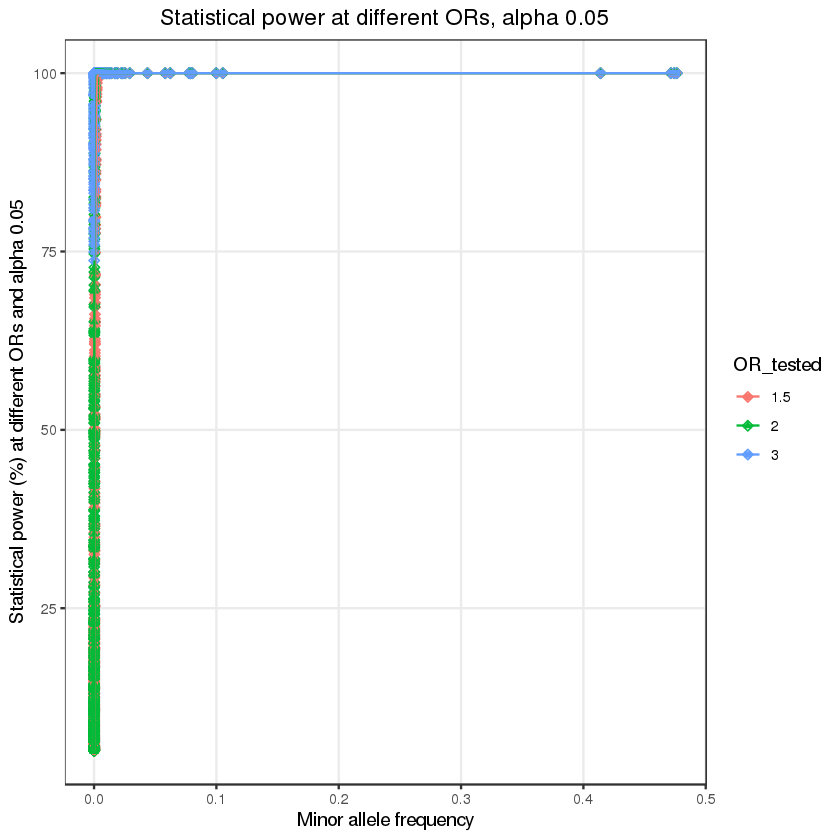

In [135]:
## Plot all
Power_plot_all748 = ggplot(AllOR_long, aes(x=allfreq, y=Power_calculated, color=OR_tested)) +
geom_point(size=2, shape=23)+
theme_bw()+
theme(panel.grid.minor = element_blank()) +
  ylab("Statistical power (%) at different ORs and alpha 0.05")+
  xlab("Minor allele frequency")+
  ggtitle("Statistical power at different ORs, alpha 0.05")+
  geom_point(size = 1.5, aes(shape = OR_tested)) +
  theme(plot.title = element_text(hjust=0.5)) +
  geom_line()

Power_plot_all748
#ggsave("./Plots_Manuscript/Power_calculations_OR1.5_2_3_23andMeData.png", Power_plot_all748, width = 8, height = 5, dpi=300, units = "in")

n
<int>
700


Warning message:
“Removed 481 rows containing missing values (geom_point).”
Warning message:
“Removed 481 rows containing missing values (geom_point).”
Warning message:
“Removed 479 row(s) containing missing values (geom_path).”
Warning message:
“Removed 481 rows containing missing values (geom_point).”
Warning message:
“Removed 481 rows containing missing values (geom_point).”
Warning message:
“Removed 479 row(s) containing missing values (geom_path).”


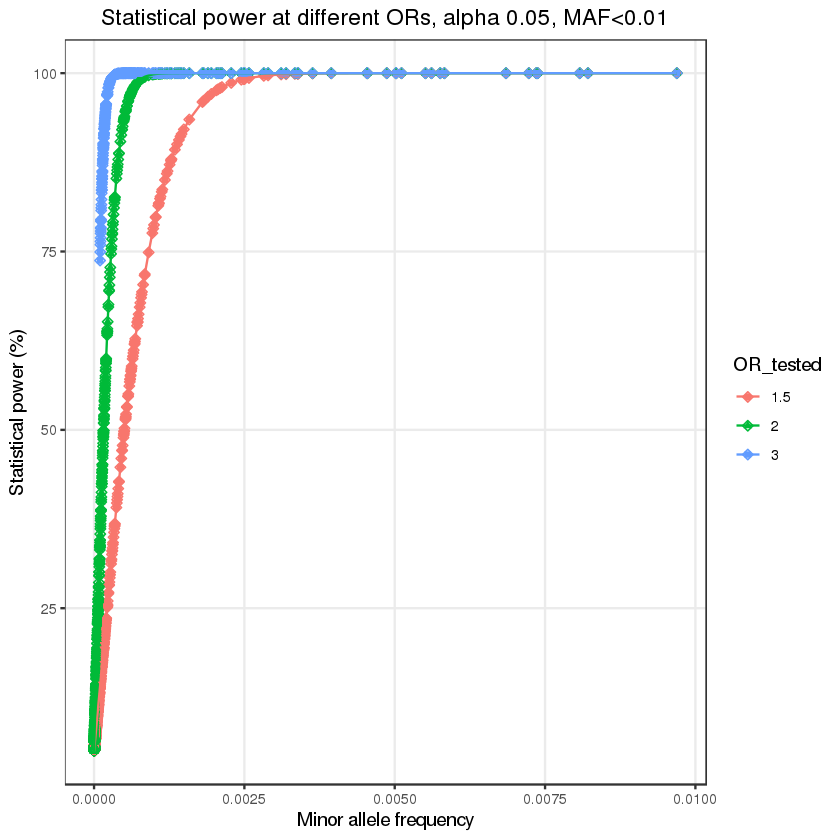

In [54]:
## Plot MAF<0.05
AllOR_long_0.01 = AllOR_long %>% filter(allfreq<0.01)
AllOR_long_0.01 %>% filter(!is.na(Power_calculated)) %>% distinct(VariantName) %>% tally()

Power_plot_0.01 = ggplot(AllOR_long_0.01, aes(x=allfreq, y=Power_calculated, color=OR_tested)) +
geom_point(size=2, shape=23)+
theme_bw()+
theme(panel.grid.minor = element_blank()) +
  ylab("Statistical power (%)")+
  xlab("Minor allele frequency")+
  ggtitle("Statistical power at different ORs, alpha 0.05, MAF<0.01")+
  geom_point(size = 1.5, aes(shape = OR_tested)) +
  theme(plot.title = element_text(hjust=0.5)) +
  geom_line()

Power_plot_0.01
#ggsave("./Plots_Manuscript/Power_calculations_OR1.5_2_3_23andMeData_MAF0.01_700variants.png", Power_plot_0.01, width = 8, height = 5, dpi=300, units = "in")

n
<int>
672


Warning message:
“Removed 481 rows containing missing values (geom_point).”
Warning message:
“Removed 481 rows containing missing values (geom_point).”
Warning message:
“Removed 479 row(s) containing missing values (geom_path).”
Warning message:
“Removed 481 rows containing missing values (geom_point).”
Warning message:
“Removed 481 rows containing missing values (geom_point).”
Warning message:
“Removed 479 row(s) containing missing values (geom_path).”


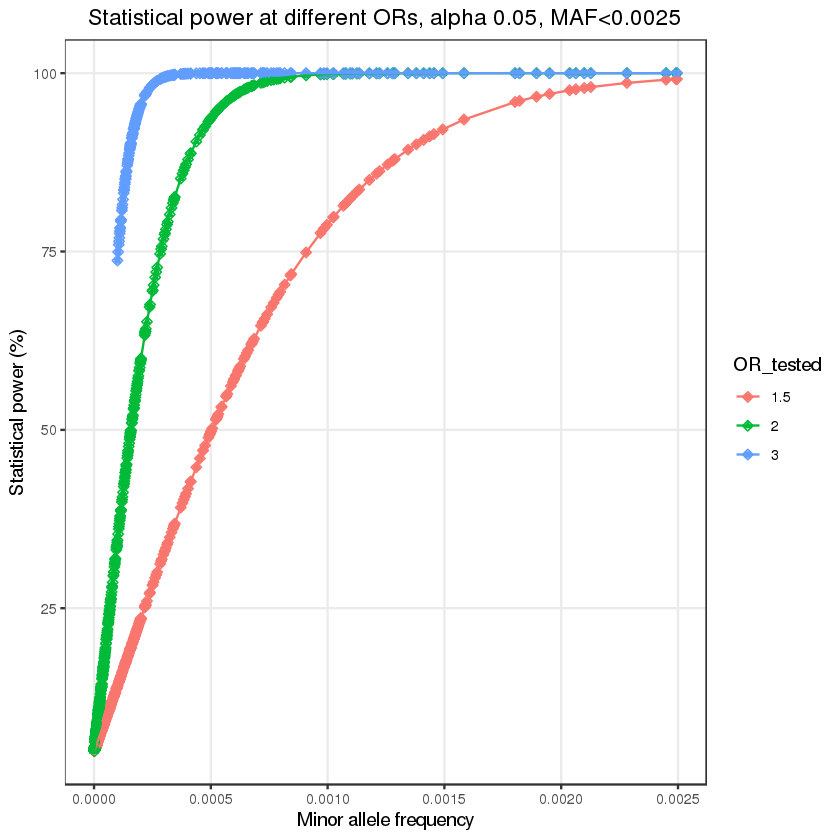

In [55]:
## Plot MAF<0.025
AllOR_long_0.025 = AllOR_long %>% filter(allfreq<0.0025)
AllOR_long_0.025 %>% filter(!is.na(Power_calculated)) %>% distinct(VariantName) %>% tally()

Power_plot_0.0025 = ggplot(AllOR_long_0.025, aes(x=allfreq, y=Power_calculated, color=OR_tested)) +
geom_point(size=2, shape=23)+
theme_bw()+
theme(panel.grid.minor = element_blank()) +
  ylab("Statistical power (%)")+
  xlab("Minor allele frequency")+
  ggtitle("Statistical power at different ORs, alpha 0.05, MAF<0.0025")+
  geom_point(size = 1.5, aes(shape = OR_tested)) +
  theme(plot.title = element_text(hjust=0.5)) +
  geom_line()

Power_plot_0.0025
#ggsave("./Plots_Manuscript/Power_calculations_OR1.5_2_3_23andMeData_MAF0.0025_672variants.png", Power_plot_0.0025, width = 8, height = 5, dpi=300, units = "in")

## Check numbers

In [58]:
## how many NA's overall?
AllOR_long %>% filter(is.na(Power_calculated)) %>% tally() #481

AllOR_long %>% group_by(OR_tested) %>% filter(is.na(Power_calculated)) %>% tally() #most at OR=3, so this should be ditched

n
<int>
481


OR_tested,n
<chr>,<int>
1.5,4
2,1
3,476


In [147]:
# OR1
## how many NAs and head them
AllOR %>% filter(is.na(Power_at_alpha005_OR1.5)) %>% arrange(allfreq) %>% select(VariantName, allfreq, Power_at_alpha005_OR1.5:Power_at_alpha005_OR3) %>% head()

## how many >80% at OR=1.5
AllOR %>% filter(Power_at_alpha005_OR1.5 >0.8) %>% tally()

## any other variants smaller than 8.2E-08?
AllOR %>% filter(allfreq<3.280261e-07) %>% head()

## try to manualy calculate them
genpwr.calc(calc = "power", model = "logistic", ge.interaction = NULL,
                        N=125000, Case.Rate=0.2, k=NULL,
                        MAF=8.277818e-08, OR=c(1.5),Alpha=0.05,
                        True.Model=c("Additive"), 
                        Test.Model=c("Additive"))

VariantName,allfreq,Power_at_alpha005_OR1.5,Power_at_alpha005_OR2,Power_at_alpha005_OR3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
GBA_H294Q,8.277818e-08,NA,0.05003568,NA
PLA2G6_M274R,1.039999e-07,NA,0.05012705,NA
NA,1.040129e-07,NA,0.05013207,NA
POLG_W1041X,3.280261e-07,NA,0.05051102,NA


n
<int>
91


Chr,Start,VariantName,MAF_23,MAF_NFE,Effect_meta3,Effect_23andMe,OR_meta3,OR_23andMe,allfreq,Power_at_alpha005_OR1.5,Power_at_alpha005_OR2,Power_at_alpha005_OR3
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,155237444,GBA_I299T,2.080874e-07,NA,-0.5033424,-0.5033424,0.6045068,0.6045068,2.080874e-07,0.05010862,0.05029241,NA
chr1,20639911,PINK1_A232V,1.040562e-07,0,-1.0007120,-1.0007120,0.3676176,0.3676176,1.040562e-07,0.05006438,0.05012316,NA
chr1,20639990,PINK1_Y258X,2.480804e-07,NA,0.0000000,0.0000000,1.0000000,1.0000000,2.480804e-07,0.05013168,0.05040205,NA
chr1,20645640,PINK1_L347P,3.151746e-07,0,0.0000000,0.0000000,1.0000000,1.0000000,3.151746e-07,0.05005968,0.05049965,NA
chr1,20649062,PINK1_G440E,2.374346e-07,NA,1.0074434,1.0074434,2.7385904,2.7385904,2.374346e-07,0.05013689,0.05029620,NA
chr12,40294909,LRRK2_S958L,2.384186e-07,0,-1.0402551,-1.0402551,0.3533645,0.3533645,2.384186e-07,0.05017107,0.05002488,NA


Test.Model,True.Model,MAF,OR,N_total,N_cases,N_controls,Case.Rate,Power_at_Alpha_0.05
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Additive,Additive,8.277818e-08,1.5,125000,25000,1e+05,0.2,0.05003364


In [4]:
# some manual playing around
genpwr.calc(calc = "power", model = "logistic", ge.interaction = NULL,
                        N=125000, Case.Rate=0.2, k=NULL,
                        MAF=0.0024927, OR=c(3),Alpha=0.05,
                        True.Model=c("Additive"), 
                        Test.Model=c("Additive"))

Test.Model,True.Model,MAF,OR,N_total,N_cases,N_controls,Case.Rate,Power_at_Alpha_0.05
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Additive,Additive,0.0024927,3,125000,25000,1e+05,0.2,1


In [5]:
genpwr.calc(calc = "power", model = "logistic", ge.interaction = NULL,
                        N=125000, Case.Rate=0.2, k=NULL,
                        MAF=0.0000181, OR=c(3),Alpha=0.05,
                        True.Model=c("Additive"), 
                        Test.Model=c("Additive"))

ERROR: Error in zero_finder_nleqslv(fa.2, veclength = 1, x.start.vals = runif(1) * : cannot find a solution under upper.lim


In [138]:
# OR2 
## how many NAs and head them
AllOR %>% filter(is.na(Power_at_alpha005_OR2)) %>% select(VariantName, allfreq, Power_at_alpha005_OR1.5:Power_at_alpha005_OR3) %>% head()

## how many >80% at OR=2
AllOR %>% filter(Power_at_alpha005_OR2 >0.8) %>% tally()

VariantName,allfreq,Power_at_alpha005_OR1.5,Power_at_alpha005_OR2,Power_at_alpha005_OR3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
POLG_W1041X,3.280474e-07,0.05019288,NA,NA


n
<int>
165


In [64]:
# how many with OR1.5 >80% have >80% at OR2?
AllOR %>% filter(Power_at_alpha005_OR1.5 >0.8) %>% group_by(Power_at_alpha005_OR2 >0.8) %>% tally()

# and vice versa
AllOR %>% filter(Power_at_alpha005_OR2 >0.8) %>% group_by(Power_at_alpha005_OR1.5 >0.8) %>% tally()

## 91

Power_at_alpha005_OR2 > 0.8,n
<lgl>,<int>
TRUE,91


Power_at_alpha005_OR1.5 > 0.8,n
<lgl>,<int>
FALSE,74
TRUE,91


In [139]:
# OR3 
## how many NAs and head them
AllOR %>% filter(is.na(Power_at_alpha005_OR3)) %>% select(VariantName, allfreq, Power_at_alpha005_OR1.5:Power_at_alpha005_OR3) %>% head()


# how many >80% at OR=3
AllOR %>% filter(Power_at_alpha005_OR3 >0.8) %>% tally()

VariantName,allfreq,Power_at_alpha005_OR1.5,Power_at_alpha005_OR2,Power_at_alpha005_OR3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
GBA_G517S,6.809994e-07,0.05016954,0.05111078,NA
GBA_R502H,7.029013e-06,0.05523130,0.06969984,NA
GBA_N501K,3.618504e-06,0.05266733,0.05589892,NA
GBA_H490R,6.583656e-07,0.05039391,0.05106963,NA
GBA_Y457C,3.573330e-06,0.05256973,0.05578350,NA
GBA_F456V,8.037209e-07,0.05052729,0.05131203,NA


n
<int>
260


In [66]:
# how many with OR3 >80% have >80% at OR2?
AllOR %>% filter(Power_at_alpha005_OR2 >0.8) %>% group_by(Power_at_alpha005_OR3 >0.8) %>% tally()

# and vice versa
AllOR %>% filter(Power_at_alpha005_OR3 >0.8) %>% group_by(Power_at_alpha005_OR2 >0.8) %>% tally()

## 165

Power_at_alpha005_OR3 > 0.8,n
<lgl>,<int>
TRUE,165


Power_at_alpha005_OR2 > 0.8,n
<lgl>,<int>
FALSE,95
TRUE,165


Chr,Start,VariantName,MAF_23,MAF_NFE,Effect_meta3,Effect_23andMe,OR_meta3,OR_23andMe,allfreq,Power_at_alpha005_OR2,Power_at_alpha005_OR3
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,155235057,GBA_G517S,6.809994e-07,NA,0.000000,0.000000,1.0000000,1.0000000,6.809994e-07,0.05111078,NA
chr1,155235195,GBA_R502H,7.029013e-06,NA,1.276524,1.276524,3.5841593,3.5841593,7.029013e-06,0.06969984,NA
chr1,155235196,GBA_R502C,1.992936e-04,0e+00,-1.262212,-1.262212,0.2830274,0.2830274,1.992936e-04,0.59600039,0.9552658
chr1,155235197,GBA_N501K,3.618504e-06,NA,NA,1.006559,NA,2.7361701,3.618504e-06,0.05589892,NA
chr1,155235231,GBA_H490R,6.583656e-07,NA,1.009280,1.009280,2.7436261,2.7436261,6.583656e-07,0.05106963,NA
chr1,155235252,GBA_L483P,NA,6e-04,0.000000,0.000000,1.0000000,1.0000000,6.000000e-04,0.96865507,0.9999942


Warning message:
“Removed 1 rows containing missing values (geom_point).”


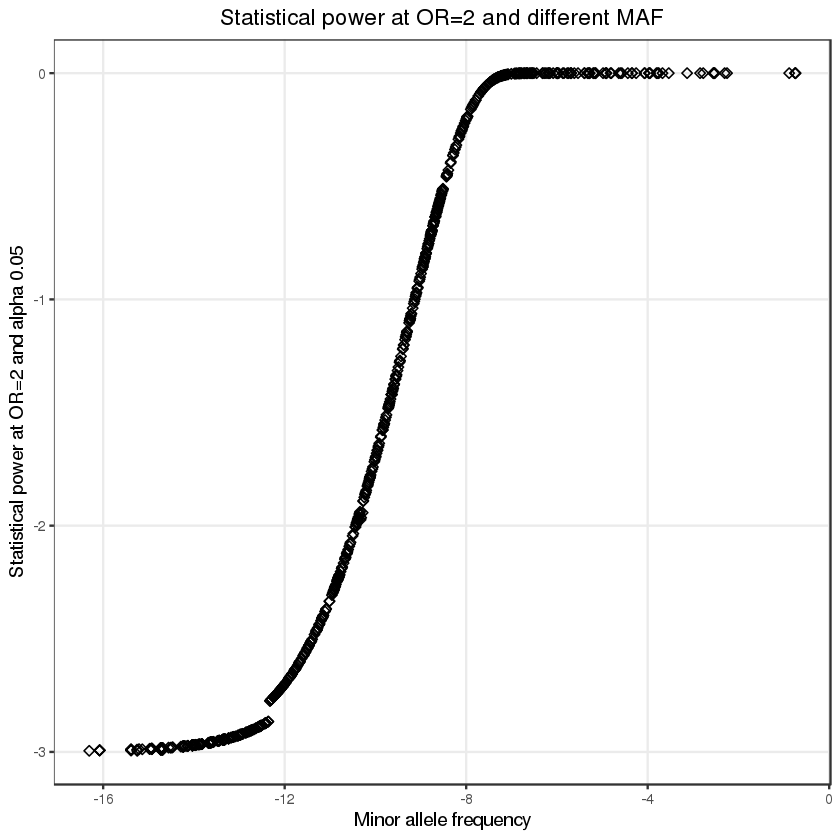

In [30]:
ORs = fread("Variants_with_power_at_OR2_OR3.txt")
head(ORs)

ggplot(ORs, aes(x=log(allfreq), y=log(Power_at_alpha005_OR2))) +
geom_point(size=2, shape=23)+
theme_bw()+
theme(panel.grid.minor = element_blank()) +
  ylab("Statistical power at OR=2 and alpha 0.05")+
  xlab("Minor allele frequency")+
  ggtitle("Statistical power at OR=2 and different MAF")+
  theme(plot.title = element_text(hjust=0.5))

Warning message:
“Removed 476 rows containing missing values (geom_point).”


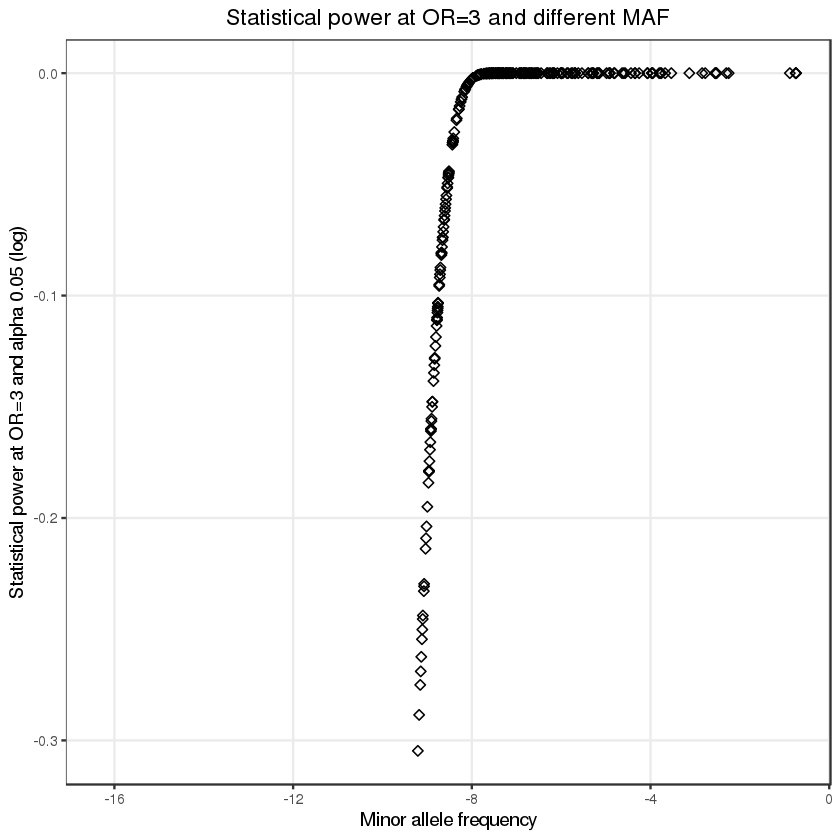

In [54]:
ggplot(ORs, aes(x=log(allfreq), y=log(Power_at_alpha005_OR3))) +
geom_point(size=2, shape=23)+
theme_bw()+
theme(panel.grid.minor = element_blank()) +
  ylab("Statistical power at OR=3 and alpha 0.05 (log)")+
  xlab("Minor allele frequency")+
  ggtitle("Statistical power at OR=3 and different MAF")+
  theme(plot.title = element_text(hjust=0.5))

In [31]:
ORs %>% filter(!is.na(Power_at_alpha005_OR2) | !is.na(Power_at_alpha005_OR3)) %>% tally()

n
<int>
747


In [ ]:
# check how many had enough power in general 
freq_clnsig = freq %>% select(VariantName, CLNSIG)
join = left_join(ORs, freq_clnsig)
join = join %>% distinct()
join %>% group_by(Start) %>% tally() %>% filter(n>1)

head(join)

In [53]:
join$EnoughPower[join$Power_at_alpha005_OR2>0.8] <- "YES"
join$EnoughPower[join$CLNSIG == "Pathogenic" & join$Power_at_alpha005_OR3>0.8] <- "YES"
join$EnoughPower[join$CLNSIG == "Pathogenic/Risk_factor" & join$Power_at_alpha005_OR3>0.8] <- "YES"

join %>% group_by(EnoughPower) %>% tally()

class(join$Power_at_alpha005_OR2)
176+649

EnoughPower,n
<chr>,<int>
YES,176
NA,650


[1] "numeric"

[1] 825

## 3. Make manuscript plots

### 3.1 23andMe only

In [34]:
annotated = fread("23andMe_834variants_annotated_and_stats.txt")
annotated = annotated %>% filter(!is.na(pvalue))

andme = annotated %>% filter(src == "G" & gt.rate >0.9 | src == "G" & p.date >1e-50 | src == "I" & avg.rsqr > 0.5| src == "I" & min.rsqr > 0.5|src == "I" & p.batch > 1e-50)
andme$FREQ = andme$freq.b
andme_edit = andme %>% mutate(FREQ = if_else(src == "I" & is.na(freq.b), dose.b, FREQ))
#andme_edit = andme_edit %>% rename("CHR.BP.REF.ALT" = MarkerName)

#minor major allele
andme_edit$minorAllele <- ifelse(andme_edit$FREQ <= 0.5, as.character(andme_edit$ALT), as.character(andme_edit$REF))
andme_edit$majorAllele <- ifelse(andme_edit$FREQ <= 0.5, as.character(andme_edit$REF), as.character(andme_edit$ALT))
head(andme_edit)

#how many variants left? 656
dim(andme_edit)

# edit gene name
andme_edit$Gene[andme_edit$Gene == "FBXO7;FBXO7"] <- "FBXO7"
### 656 VARIANTS IN 23ANDME ###

CHR.BP.REF.ALT,position,Gene,assay.name,AF_nfe,ExonicFunc.refGene,VariantName,CLNDN,CLNREVSTAT,CLNSIG,⋯,gt.rate,hw.p.value,p.date,freq.b,avg.rsqr,min.rsqr,p.batch,FREQ,minorAllele,majorAllele
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
chr1:155235195:C:T,155235195,GBA,rs80356772,.,nonsynonymous SNV,GBA_R502H,Gaucher_disease_type_I|Gaucher_disease_type_II|Gaucher_disease_type_III|Gaucher_disease_type_3C|Gaucher_disease|not_provided,"criteria_provided,_conflicting_interpretations",Conflicting_interpretations_of_pathogenicity,⋯,0.9996900,1,8.410985e-03,7.029013e-06,NA,NA,NA,7.029013e-06,NA,NA
chr1:155235196:G:A,155235196,GBA,rs80356771,0,nonsynonymous SNV,GBA_R502C,"Lewy_body_dementia|Parkinson_disease,_late-onset|Gaucher_disease_type_I|Gaucher_disease_type_II|Gaucher_disease_type_III|Gaucher_disease_type_3C|Gaucher_disease,_perinatal_lethal|Gaucher_disease|not_provided","criteria_provided,_multiple_submitters,_no_conflicts",Pathogenic,⋯,0.9997395,1,2.044806e-03,9.998007e-01,NA,NA,NA,9.998007e-01,NA,NA
chr1:155235231:T:C,155235231,GBA,rs76071730,.,nonsynonymous SNV,GBA_H490R,.,.,.,⋯,0.9964019,1,7.048684e-01,9.999993e-01,NA,NA,NA,9.999993e-01,NA,NA
chr1:155235708:G:C,155235708,GBA,rs121908295,.,nonsynonymous SNV,GBA_P454R,Gaucher_disease_type_II,no_assertion_criteria_provided,Pathogenic,⋯,0.9992489,1,3.564141e-100,9.999596e-01,NA,NA,NA,9.999596e-01,NA,NA
chr1:155235765:T:G,155235765,GBA,rs75385858,.,nonsynonymous SNV,GBA_N435T,.,.,.,⋯,0.9946707,1,3.425922e-01,9.999990e-01,NA,NA,NA,9.999990e-01,NA,NA
chr1:155235777:T:A,155235777,GBA,rs77738682,.,nonsynonymous SNV,GBA_N431I,.,.,.,⋯,0.8652452,1,2.308592e-02,9.999805e-01,NA,NA,NA,9.999805e-01,NA,NA


[1] 656  44

In [35]:
# add power file
OR2_3 = fread("Variants_with_power_at_OR2_OR3.txt")
OR2_3 = OR2_3 %>% select(Chr, Start, VariantName, MAF_23, MAF_NFE, Power_at_alpha005_OR2, Power_at_alpha005_OR3) %>% unite(`CHR:BP`, c("Chr", "Start"), sep = ":")

# joinOR2_3
andme_power = left_join(andme_edit, OR2_3)
dim(andme_power)

Joining, by = "VariantName"


[1] 855  49

In [32]:
# how many variants had enough power?
andme_power$EnoughPower[andme_power$Power_at_alpha005_OR2>0.8] <- "YES"
andme_power$EnoughPower[andme_power$CLNSIG == "Pathogenic" & andme_power$Power_at_alpha005_OR3>0.8] <- "YES"
andme_power$EnoughPower[andme_power$CLNSIG == "Pathogenic/Risk_factor" & andme_power$Power_at_alpha005_OR3>0.8] <- "YES"

andme_power %>% group_by(EnoughPower) %>% tally()

EnoughPower,n
<chr>,<int>
YES,184
NA,582


In [33]:
# how many variants for each group with power?
## at OR 3
andme_power %>% filter(CLNSIG == "Pathogenic" & Power_at_alpha005_OR3>0.8) %>% tally()
andme_power %>% filter(CLNSIG == "Pathogenic/Risk_factor" & Power_at_alpha005_OR3 > 0.8) %>% tally()

## at OR 2
185-14

n
<int>
9


n
<int>
0


[1] 171

Gene,n
<chr>,<int>
POLG,87
LRRK2,86
VPS13C,82
PLA2G6,54
GBA,52
PINK1,38


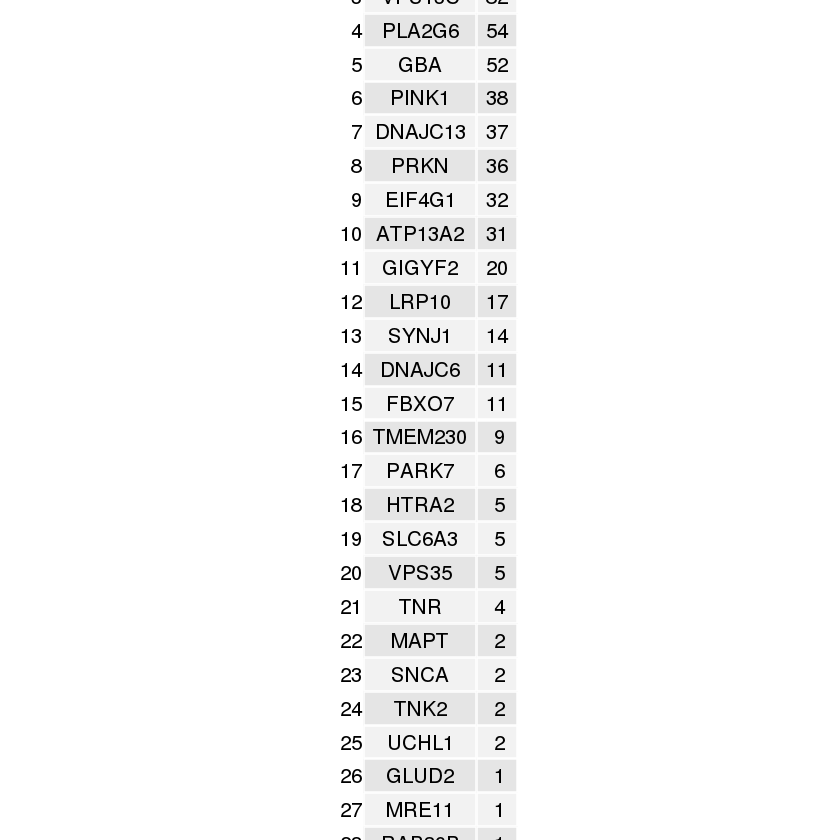

In [34]:
# how many genes?
GenelistANDME= andme_edit %>% group_by(Gene) %>% tally() %>% arrange(-n)
# 32 genes, with POLG having 87 variants
head(GenelistANDME)
#png("./Plots_Manuscript/List_of_genes_table_23andMeONLY.png", width=400,height=900,bg = "white")
grid.table(GenelistANDME)
#dev.off()

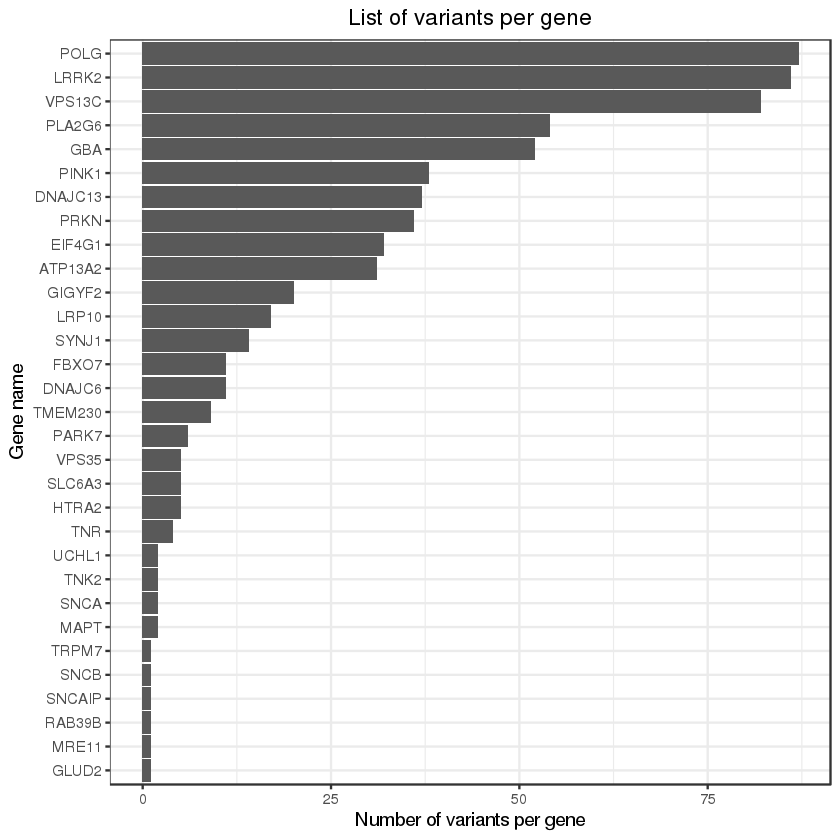

In [35]:
# variants per gene
genesANDME_656 = andme_edit %>% group_by(Gene) %>% tally() %>% mutate(perc = n/sum(n)*100) %>% arrange(-n)
genelist = ggplot(genesANDME_656,
       aes(x = n,
           y = reorder(Gene, n)
       )
) +
  theme_bw()+
  ggtitle("List of variants per gene")+
  theme(plot.title = element_text(hjust=0.5))+
  scale_fill_brewer(palette = "Pastel1")+
  labs(title="List of variants per gene", 
       x="Number of variants per gene", y = "Gene name")+
  geom_col()

genelist

#ggsave("./Plots_Manuscript/656_variants_per_gene_23andMeONLY.png", genelist, width = 8, height = 5, dpi=300, units = "in")

CLNSIG,n,perc
<chr>,<int>,<dbl>
Conflicting/Uncertain/Unknown,461,70.2743902
Pathogenic,106,16.1585366
Benign,82,12.5000000
Risk_factor,5,0.7621951
Pathogenic/Risk_factor,2,0.3048780


png 
  2

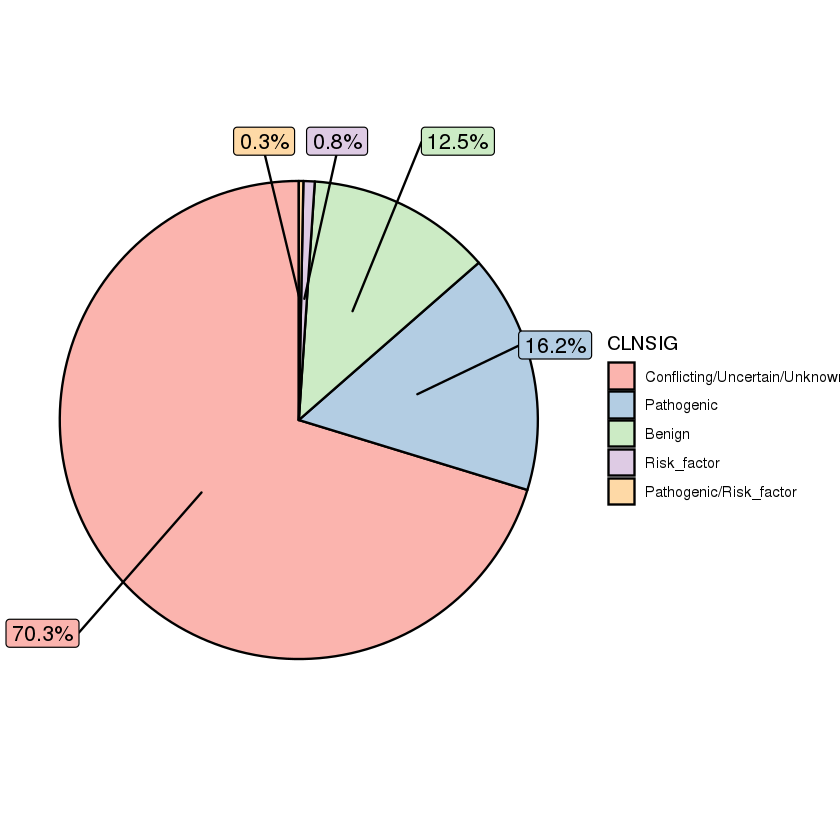

In [36]:
# clinical significance of those variants?
library(ggrepel)
andme_edit$CLNSIG[andme_edit$CLNSIG == "Likely_pathogenic"] <- "Pathogenic"
andme_edit$CLNSIG[andme_edit$CLNSIG == "Pathogenic/Likely_pathogenic"] <- "Pathogenic"
andme_edit$CLNSIG[andme_edit$CLNSIG == "Likely_benign"] <- "Benign"
andme_edit$CLNSIG[andme_edit$CLNSIG == "Benign/Likely_benign"] <- "Benign"
andme_edit$CLNSIG[andme_edit$CLNSIG == "Uncertain_significance"] <- "Conflicting/Uncertain/Unknown"
andme_edit$CLNSIG[andme_edit$CLNSIG == "Conflicting_interpretations_of_pathogenicity"] <- "Conflicting/Uncertain/Unknown"
andme_edit$CLNSIG[andme_edit$CLNSIG == "."] <- "Conflicting/Uncertain/Unknown"
andme_edit$CLNSIG[andme_edit$CLNSIG == "Conflicting_interpretations_of_pathogenicity|_risk_factor"] <- "Conflicting/Uncertain/Unknown"
andme_edit$CLNSIG[andme_edit$CLNSIG == "Pathogenic/Likely_pathogenic|_risk_factor"] <- "Pathogenic/Risk_factor"
andme_edit$CLNSIG[andme_edit$CLNSIG == "Pathogenic|_risk_factor"] <- "Pathogenic/Risk_factor"  
andme_edit$CLNSIG[andme_edit$CLNSIG == "risk_factor"] <- "Risk_factor"


group_CLNSIG = andme_edit
group_CLNSIG = group_CLNSIG %>% group_by(CLNSIG) %>% tally() %>% arrange(-n) %>% mutate(perc = n/sum(n)*100) %>% ungroup()
group_CLNSIG


# Get the positions
df2 <- group_CLNSIG %>% 
  mutate(csum = rev(cumsum(rev(perc))), 
         pos = perc/2 + lead(csum, 1),
         pos = if_else(is.na(pos), perc/2, pos))

png("./Clinical_significance_of_all_23andME_ONLY_656.txt", width=400,height=600,bg = "white")
Pie_chart = ggplot(group_CLNSIG, aes(x = "" , y = perc, fill = fct_inorder(CLNSIG))) +
  geom_col(width = 1, color = 1) +
  coord_polar(theta = "y") +
  scale_fill_brewer(palette = "Pastel1") +
  geom_label_repel(data = df2,
                   aes(y = pos, label = paste0(round(perc, digits = 1), "%")),
                   size = 4.5, nudge_x = 1, show.legend = FALSE) +
  guides(fill = guide_legend(title = "CLNSIG")) +
  theme_void()
dev.off()

Pie_chart

## plot highlights: majority of variants are uncertain, unknown, or conflicting with regards to their clinical significance

In [37]:
# previously associated with PD?
andme_edit %>% group_by(grepl("Parkinson", CLNDN)) %>% tally() %>% mutate(perc = n/sum(n)*100)
## 484 not associated with PD before - tie this back in later!

"grepl(""Parkinson"", CLNDN)",n,perc
<lgl>,<int>,<dbl>
FALSE,484,73.78049
TRUE,172,26.21951


In [38]:
# how many variants p<0.05?
andme_edit %>% filter(pvalue <0.05) %>% tally()
## 50

n
<int>
50


In [39]:
# how many pass Bonferroni? 0.05/656=7.6219512195122e-05
0.05/656
andme_edit %>% filter(pvalue <7.6219512195122e-05) %>% tally()
## 8

[1] 7.621951e-05

n
<int>
8


In [40]:
# Dive deeper into 50 variants with p<0.05 
andme_edit1 = andme_edit %>% mutate(Effectv2 = if_else(effect <0, abs(effect), effect))
andme_edit1 = andme_edit1 %>% mutate(OR = exp(Effectv2), L95 = exp(Effectv2 - 1.96*stderr), U95 = exp(Effectv2 + 1.96*stderr))
andme_edit1$U95 = as.numeric(andme_edit1$U95)
andme_0.05 = andme_edit1 %>% filter(pvalue<0.05)
dim(andme_0.05)

[1] 50 55

In [41]:
## Make table of 50 variants
### merge power onto variants

# minor edits
#andme_0.05 = andme_0.05 %>% rename("Chr" = scaffold, "Start" = position)
OR2_3 = fread("Variants_with_power_at_OR2_OR3.txt")
OR2_3 = OR2_3 %>% select(Chr, Start, VariantName, MAF_23, MAF_NFE, Power_at_alpha005_OR2, Power_at_alpha005_OR3) %>% unite(`CHR:BP`, c("Chr", "Start"), sep = ":")

# joinOR2_3
andme_0.05_power = left_join(andme_0.05, OR2_3)
dim(andme_0.05_power)
#write.table(andme_0.05_power, "./Tables_Manuscript/50_signifificant_variants_23andMe_only_allcolumns.txt", row.names =F, sep= "\t", quote = F)

andme_0.05_power_select = andme_0.05_power %>% select(`CHR:BP`, REF, ALT,assay.name, VariantName, CLNDN, CLNSIG, MAF_23, MAF_NFE, Power_at_alpha005_OR2, Power_at_alpha005_OR3, effect, stderr, L95, OR, U95, pvalue)
#write.table(andme_0.05_power_select, "./Tables_Manuscript/50_significant_variants_23andMe_only_selectedcolumns.txt", row.names = F, sep = "\t", quote = F)

Joining, by = "VariantName"


[1] 50 60

In [51]:
PD_assoc = ggplot(andme_0.05_CI, mapping = aes(x= OR, y = reorder(VariantName, -OR)))+
  geom_vline(aes(xintercept =1), size = .5, linetype = "dashed")+
  geom_errorbarh(aes(xmax = U95, xmin = L95), size = .5, height = .2) +
  geom_point(size = 3.5, aes(color = CLNSIG)) +
  scale_x_continuous(breaks = seq(0,30,1.5), labels = seq(0,30,1.5), limits = c(0,30)) +
  theme_bw()+
facet_grid(~PD_assoc)+
  theme(panel.grid.minor = element_blank()) +
  ylab("Variants")+
  xlab("OR (95% CI)")+
  ggtitle("23andMe summary statistics p<0.05, CI<30")+
  theme(plot.title = element_text(hjust=0.5))

ggsave("./Plots_Manuscript/Forest_plot_0.05_CI30_23andMe_ONLY_31variants_CLNSIG_shape_grouped_Assoc.png", PD_assoc, width = 13, height = 8, dpi=300, units = "in")

In [29]:
# Bonferroni variants p<7.6219512195122e-05 & CI<30
andme_0.05_CI %>% filter(pvalue <7.6219512195122e-05) %>% tally()
andme_0.05_CI_Bonfer = andme_0.05_CI %>% filter(pvalue <7.6219512195122e-05)

andme_0.05_CI_Bonfer %>% select(VariantName, OR, pvalue, CLNSIG) %>% arrange(-OR)

n
<int>
7


VariantName,OR,pvalue,CLNSIG
<chr>,<dbl>,<dbl>,<chr>
LRRK2_G2019S,11.942566,3.779838e-250,Pathogenic/Risk_factor
GBA_R502C,3.533227,8.495697e-08,Pathogenic
GBA_D179H,3.363911,4.269256e-06,Conflicting/Uncertain/Unknown
GBA_N409S,2.248579,3.085863e-44,Pathogenic/Risk_factor
GBA_T408M,1.492278,3.184684e-16,Conflicting/Uncertain/Unknown
GBA_E365K,1.445835,1.024382e-19,Conflicting/Uncertain/Unknown
PRKN_R275W,1.417634,2.761782e-06,Pathogenic


In [102]:
# Clinical significance
andme_0.05_CI_Bonfer %>% arrange(CLNSIG) %>% select(VariantName, CLNSIG, OR) %>% arrange(-OR)

VariantName,CLNSIG,OR
<chr>,<chr>,<dbl>
LRRK2_G2019S,Pathogenic/Risk_factor,11.942566
GBA_R502C,Pathogenic,3.533227
GBA_D179H,Conflicting/Uncertain/Unknown,3.363911
GBA_N409S,Pathogenic/Risk_factor,2.248579
GBA_T408M,Conflicting/Uncertain/Unknown,1.492278
GBA_E365K,Conflicting/Uncertain/Unknown,1.445835
PRKN_R275W,Pathogenic,1.417634


In [103]:
# how many of those not yet associated with PD?
andme_0.05_CI_Bonfer %>% group_by(grepl("Parkinson", CLNDN)) %>% tally()

"grepl(""Parkinson"", CLNDN)",n
<lgl>,<int>
FALSE,2
TRUE,5


In [106]:
# YES - previously associated with PD
andme_0.05_CI_Bonfer %>% filter(grepl("arkinson", CLNDN)) %>% arrange(CLNSIG) %>% select(VariantName, CLNSIG, CLNDN, assay.name)

VariantName,CLNSIG,CLNDN,assay.name
<chr>,<chr>,<chr>,<chr>
GBA_T408M,Conflicting/Uncertain/Unknown,"Parkinson_disease,_late-onset|Gaucher_disease,_perinatal_lethal|Gaucher_disease|not_specified|not_provided",rs75548401
GBA_R502C,Pathogenic,"Lewy_body_dementia|Parkinson_disease,_late-onset|Gaucher_disease_type_I|Gaucher_disease_type_II|Gaucher_disease_type_III|Gaucher_disease_type_3C|Gaucher_disease,_perinatal_lethal|Gaucher_disease|not_provided",rs80356771
PRKN_R275W,Pathogenic,See_cases|Neoplasm_of_ovary|Lung_carcinoma|Parkinson_disease_2|Leprosy_2|Young-onset_Parkinson_disease|not_provided,rs34424986
GBA_N409S,Pathogenic/Risk_factor,"Thrombocytopenia|Abnormal_bleeding|Rigidity|Akinesia|Parkinson_disease|Lewy_body_dementia|Parkinson_disease,_late-onset|Gaucher_disease_type_I|Gaucher_disease_type_II|Gaucher_disease_type_III|Gaucher_disease_type_3C|Gaucher_disease,_perinatal_lethal|Gaucher_disease|Dementia,_Lewy_body,_susceptibility_to|not_provided",rs76763715
LRRK2_G2019S,Pathogenic/Risk_factor,"Parkinson_disease,_late-onset|Parkinson_disease_8,_autosomal_dominant|Young-onset_Parkinson_disease|Inborn_genetic_diseases|not_provided",rs34637584


In [104]:
# NO - not yet associated with PD
andme_0.05_CI_Bonfer %>% filter(!grepl("arkinson", CLNDN)) %>% arrange(CLNSIG) %>% select(VariantName, CLNSIG, CLNDN, assay.name)

VariantName,CLNSIG,CLNDN,assay.name
<chr>,<chr>,<chr>,<chr>
GBA_E365K,Conflicting/Uncertain/Unknown,.,rs2230288
GBA_D179H,Conflicting/Uncertain/Unknown,.,rs147138516


In [ ]:
# write Bonferoni variants in table
andme_0.05_CI_Bonfer_select = andme_0.05_CI_Bonfer %>% select(CHR, BP, REF, ALT,assay.name, VariantName, CLNDN, CLNSIG, MAF_23, MAF_NFE, Power_at_alpha005_OR2, Power_at_alpha005_OR3, effect, stderr, L95, OR, U95, pvalue)
#write.table(andme_0.05_CI_Bonfer_select, "./Tables_Manuscript/6_variants_Bonferroni_sig_23andMe_only.txt", row.names = F, sep = "\t", quote =F)

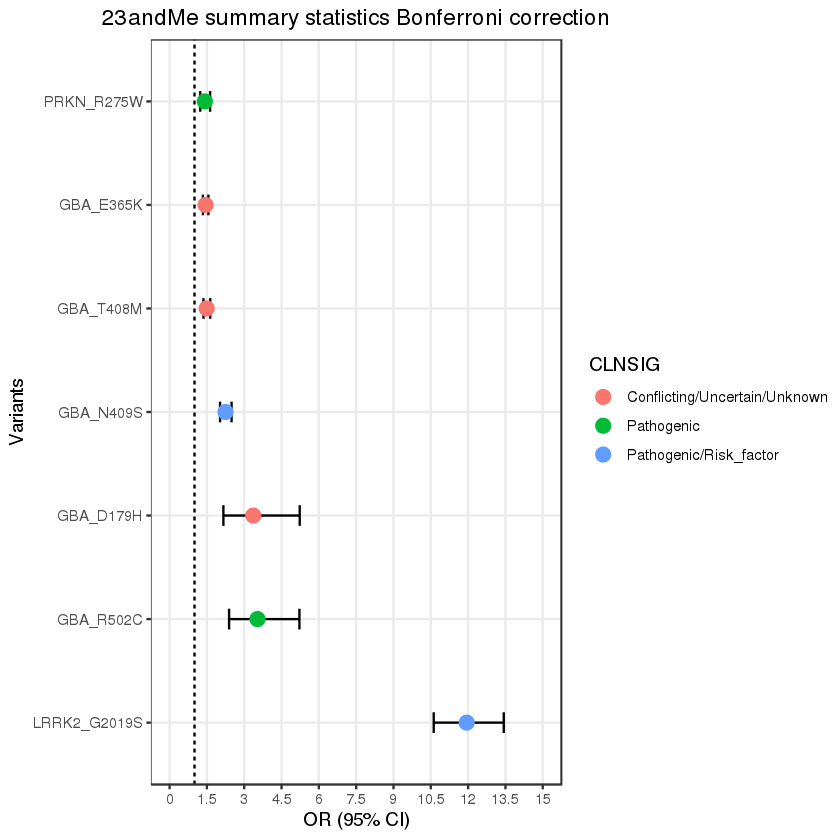

In [36]:
# Forest plot Bonferroni
Plot_0.05_CI_Bon = ggplot(andme_0.05_CI_Bonfer, mapping = aes(x= OR, y = reorder(VariantName, -OR)))+
  geom_vline(aes(xintercept =1), size = .5, linetype = "dashed")+
  geom_errorbarh(aes(xmax = U95, xmin = L95), size = .5, height = .2) +
  geom_point(size = 3.5, aes(color = CLNSIG)) +
  scale_x_continuous(breaks = seq(0,15,1.5), labels = seq(0,15,1.5), limits = c(0,15)) +
  theme_bw()+
  theme(panel.grid.minor = element_blank()) +
  ylab("Variants")+
  xlab("OR (95% CI)")+
  ggtitle("23andMe summary statistics Bonferroni correction")+
  theme(plot.title = element_text(hjust=0.5))

ggsave("./Plots_Manuscript/Forest_plot_Bonferroni_CI30_23andMe_ONLY_7variants_CLNSIG_shape.png", Plot_0.05_CI_Bon, width = 12, height = 5, dpi=300, units = "in")

Plot_0.05_CI_Bon

## 3.2 Meta analysis all 3 studies

In [2]:
meta3 = fread("Meta_results_679_AMP_UKB_23andMe_annotation.txt")
head(meta3)
colnames(meta3)

MarkerName,Allele1,Allele2,Freq1,FreqSE,MinFreq,MaxFreq,Effect,StdErr,P-value,⋯,AF_nfe,AF_fin,AF_asj,AF_oth,non_topmed_AF_popmax,non_neuro_AF_popmax,non_cancer_AF_popmax,controls_AF_popmax,VariantName,CHR.BP
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1:20638104,a,c,0.0000,0.0000,0.0000,0.0000,-1.0083,18.4693,0.9565,⋯,.,.,.,.,.,.,.,.,PINK1_A217D,chr1:20638104
chr22:38112571,a,c,0.0001,0.0000,0.0001,0.0001,0.3509,0.6857,0.6088,⋯,.,.,.,.,.,.,.,.,PLA2G6_D737Y,chr22:38112571
chr3:195867623,t,c,0.7633,0.4041,0.0153,0.0172,-0.0300,0.0313,0.3375,⋯,0.0170,0.0066,0,0.0111,0.0257,0.0250,.,0.0295,TNK2_R877H,chr3:195867623
chr1:155235727,c,g,0.0866,0.2811,0.0001,0.0001,0.2265,0.4011,0.5723,⋯,0.0001,0,0,0,0.0007,0.0006,.,0.0011,GBA_D448H,chr1:155235727
chr15:89318617,t,c,0.0428,0.2023,0.0000,0.0000,4.0973,2.3039,0.07533,⋯,.,.,.,.,.,.,.,.,POLG_E1136K,chr15:89318617
chr2:232791124,a,t,0.0006,0.0000,0.0004,0.0006,0.1359,0.1863,0.4657,⋯,0.0010,0,0.0069,0,0.0013,0.0011,.,0.0024,GIGYF2_D349E,chr2:232791124


[1] "MarkerName"           "Allele1"              "Allele2"             
 [4] "Freq1"                "FreqSE"               "MinFreq"             
 [7] "MaxFreq"              "Effect"               "StdErr"              
[10] "P-value"              "Direction"            "HetISq"              
[13] "HetChiSq"             "HetDf"                "HetPVal"             
[16] "End"                  "Ref"                  "Alt"                 
[19] "Func.refGene"         "Gene"                 "GeneDetail.refGene"  
[22] "ExonicFunc.refGene"   "AAChange"             "avsnp150"            
[25] "CLNALLELEID"          "CLNDN"                "CLNDISDB"            
[28] "CLNREVSTAT"           "CLNSIG"               "AF"                  
[31] "AF_popmax"            "AF_male"              "AF_female"           
[34] "AF_raw"               "AF_afr"               "AF_sas"              
[37] "AF_amr"               "AF_eas"               "AF_nfe"              
[40] "AF_fin"               "AF_asj"               "AF_oth"              
[43] "non_topmed_AF_popmax" "non_neuro_AF_popmax"  "non_cancer_AF_popmax"
[46] "controls_AF_popmax"   "VariantName"          "CHR.BP"

In [3]:
# check file for one variant
# edit gene name
meta3$Gene[meta3$Gene == "FBXO7;FBXO7"] <- "FBXO7"
meta3 %>% filter(VariantName == "LRRK2_G2019S") %>% select(VariantName,Direction)

VariantName,Direction
<chr>,<chr>
LRRK2_G2019S,+++


[1] 31  2

null device 
          1

Gene,Number of variants
<chr>,<int>
POLG,87
LRRK2,86
VPS13C,85
GBA,57
PLA2G6,55
DNAJC13,38


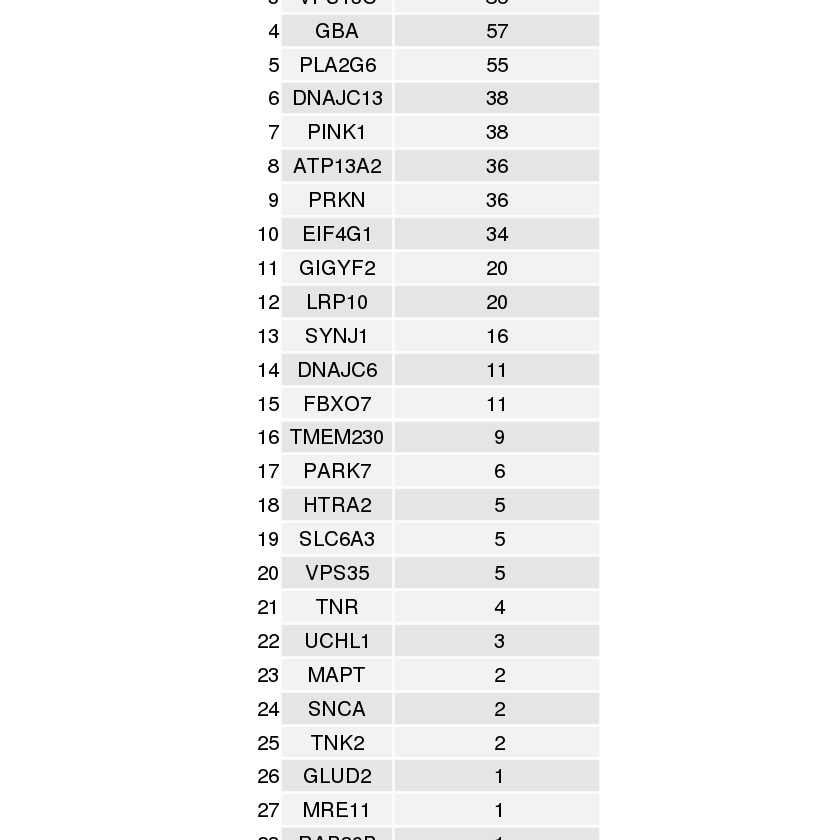

In [4]:
# how many genes?
Genelist = meta3 %>% group_by(Gene) %>% tally() %>% arrange(desc(n)) %>% rename("Number of variants" = n)
dim(Genelist)
#png("./Plots_Manuscript/List_of_genes_table.png", width=400,height=900,bg = "white")
grid.table(Genelist)
dev.off()

head(Genelist)

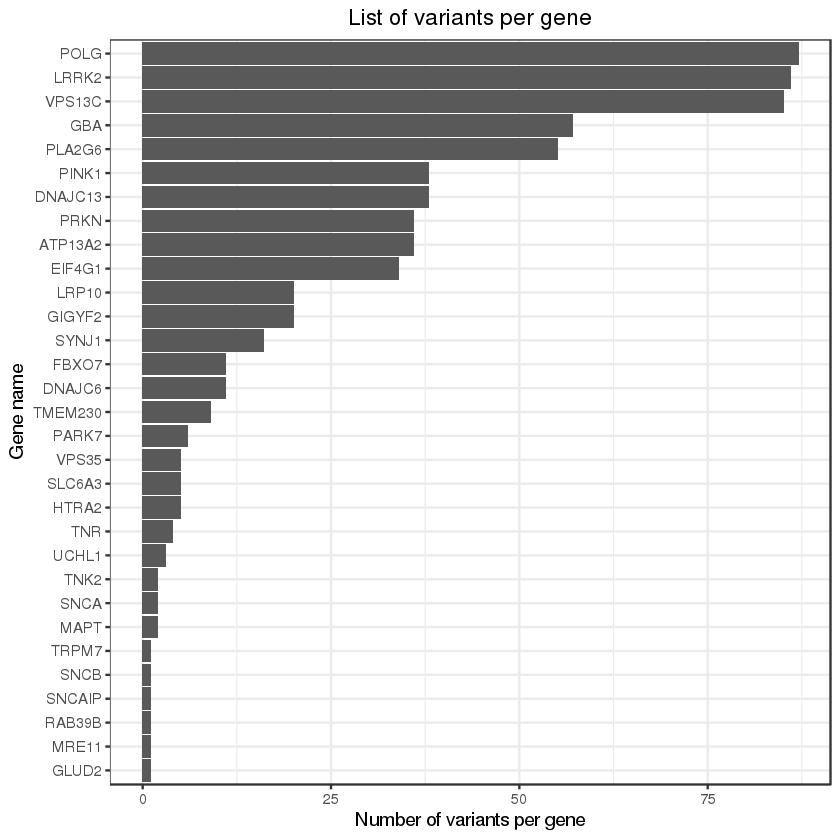

In [64]:
# how many variants per gene?
genesMeta_679 = meta3 %>% group_by(Gene) %>% tally() %>% mutate(perc = n/sum(n)*100) %>% arrange(-n)

genelist = ggplot(genesMeta_679,
       aes(x = n,
           y = reorder(Gene, n)
       )
) +
  theme_bw()+
  ggtitle("List of variants per gene")+
  theme(plot.title = element_text(hjust=0.5))+
  scale_fill_brewer(palette = "Pastel1")+
  labs(title="List of variants per gene", 
       x="Number of variants per gene", y = "Gene name")+
  geom_col()

genelist

# ggsave("./Plots_Manuscript/679_variants_per_gene.png", genelist, width = 8, height = 5, dpi=300, units = "in")

In [21]:
# add more stats
meta3_1 = meta3 %>% mutate(Effectv2 = if_else(Effect <0, abs(Effect), Effect))
meta3_1 = meta3_1 %>% mutate(OR = exp(Effectv2), L95 = exp(Effectv2 - 1.96*StdErr), U95 = exp(Effectv2 + 1.96*StdErr))
meta3_1$U95 = as.numeric(meta3_1$U95)

In [22]:
# join power calculation on meta file
OR2_3 = fread("Variants_with_power_at_OR2_OR3.txt")
OR2_3 = OR2_3 %>% select(Chr, Start, VariantName, MAF_23, MAF_NFE, Power_at_alpha005_OR2, Power_at_alpha005_OR3) %>% unite(MarkerName, c("Chr", "Start"), sep = ":")

# joinOR2_3
meta3_power = left_join(meta3_1, OR2_3)
meta3 = meta3_power


Joining, by = c("MarkerName", "VariantName", "MAF_23", "MAF_NFE",
"Power_at_alpha005_OR2", "Power_at_alpha005_OR3")


In [26]:
# how many p<0.05? n=56
meta3 %>% filter(`P-value` < 0.05) %>% tally()
# 56

# could be a table 
meta3 %>% filter(`P-value` < 0.05) %>% select(MarkerName, VariantName, avsnp150, `P-value`, L95, OR, U95, StdErr) %>% arrange(-OR) %>% head()

class(meta3$`P-value`)
meta3$`P-value` = as.numeric(meta3$`P-value`)
meta3_0.05 = meta3 %>% filter(`P-value` < 0.05)

n
<int>
56


MarkerName,VariantName,avsnp150,P-value,L95,OR,U95,StdErr
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr6:162443384,PRKN_R33X,rs770591350,0.0001771,1591.900716,5111993.482,1.641590e+10,4.1196
chr22:32475067,FBXO7_T22M,rs121918305,0.0002518,689.906444,1290577.048,2.414225e+09,3.8439
chr1:65401812,DNAJC6_S663L,rs143504255,0.0009783,88.185981,62805.630,4.472987e+07,3.3512
chr1:155235813,GBA_D419A,rs77284004,0.007328,8.919144,3401.256,1.297046e+06,3.0325
chr22:38112534,PLA2G6_W749S,rs587784351,0.00728,7.824032,2055.964,5.402569e+05,2.8425
chr1:20649095,PINK1_N451S,rs747400197,0.009404,6.412082,1950.225,5.931579e+05,2.9171


[1] "character"

In [27]:
# check out LRRK2 G2019S
meta3_0.05 %>% filter(VariantName=="LRRK2_G2019S") %>% select(VariantName, `P-value`, OR, L95, U95)

VariantName,P-value,OR,L95,U95
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
LRRK2_G2019S,0,11.76113,10.48087,13.19777


In [28]:
# How many p<0.05 and CI? n=33
meta3_0.05 = meta3_0.05 %>% mutate(CI_range = U95-L95)
meta3_0.05_CI = meta3_0.05 %>% filter(CI_range<30)
dim(meta3_0.05_CI)

[1] 40 57

In [29]:
meta3_0.05_CI %>% select(VariantName, OR) %>% arrange(-OR) %>% head()

VariantName,OR
<chr>,<dbl>
LRRK2_G2019S,11.761130
EIF4G1_L604V,6.529302
VPS13C_I1804V,5.906775
DNAJC13_R1830H,5.660431
GBA_T362I,5.488198
ATP13A2_R880H,5.142298


In [30]:
# write all p<0.05 in table
meta3_0.05_significant = meta3_0.05 %>% select(MarkerName, Ref, Alt,avsnp150, VariantName, CLNDN, CLNSIG, MAF_23, MAF_NFE, Power_at_alpha005_OR2, Power_at_alpha005_OR3, Effect, StdErr, L95, OR, U95, CI_range, `P-value`)
#write.table(meta3_0.05_significant, "./Tables_Manuscript/56_variants_significant_meta3.txt", row.names = F, sep = "\t", quote = F)

In [31]:
# write all p<0.05 & CI <30 in table
meta3_0.05_CI_table = meta3_0.05_CI %>% select(MarkerName, Ref, Alt,avsnp150, VariantName, CLNDN, CLNSIG, MAF_23, MAF_NFE, Power_at_alpha005_OR2, Power_at_alpha005_OR3, Effect, StdErr, L95, OR, U95, CI_range, `P-value`)
#write.table(meta3_0.05_CI_table, "./Tables_Manuscript/40_variants_significant_95CI_meta3.txt", row.names = F, sep = "\t", quote = F)

In [50]:
# how many are different to 23andMe only?
andme_0.05_CI_addon = andme_0.05_CI %>% separate(CHR.BP.REF.ALT, c("Chr", "BP", "REF", "ALT"), sep = ":") %>% unite("MarkerName", c("Chr", "BP"), sep = ":") %>% select(MarkerName) 

anti = anti_join(meta3_0.05_CI,andme_0.05_CI_addon)
dim(anti)
# 11 variants are significant with CI<30 filters in meta-analysis and are not present in 23andMe only data (i.e. came from other 2 studies)

Joining, by = "MarkerName"


[1] 11 57

In [51]:
# how many of the 12 have enough power?
anti$EnoughPower[anti$Power_at_alpha005_OR2>0.8] <- "YES"
anti$EnoughPower[anti$CLNSIG == "Pathogenic" & anti$Power_at_alpha005_OR3>0.8] <- "YES"
anti$EnoughPower[anti$CLNSIG == "Likely_pathogenic" & anti$Power_at_alpha005_OR3>0.8] <- "YES"
anti$EnoughPower[anti$CLNSIG == "Pathogenic/Likely_pathogenic" & anti$Power_at_alpha005_OR3>0.8] <- "YES"

anti %>% group_by(EnoughPower) %>% tally()

EnoughPower,n
<chr>,<int>
YES,3
NA,8


In [56]:
## more detail on those that are in meta but not in 23andMe
Onlymeta = left_join(anti, meta3)
Onlymeta %>% group_by(Gene) %>% tally() %>% arrange(-n)
Onlymeta %>% group_by(CLNSIG) %>% tally() %>% arrange(-n)
Onlymeta %>% select(VariantName, OR, CLNSIG)

Joining, by = c("MarkerName", "Allele1", "Allele2", "Freq1", "FreqSE",
"MinFreq", "MaxFreq", "Effect", "StdErr", "P-value", "Direction", "HetISq",
"HetChiSq", "HetDf", "HetPVal", "End", "Ref", "Alt", "Func.refGene", "Gene",
"GeneDetail.refGene", "ExonicFunc.refGene", "AAChange", "avsnp150",
"CLNALLELEID", "CLNDN", "CLNDISDB", "CLNREVSTAT", "CLNSIG", "AF", "AF_popmax",
"AF_male", "AF_female", "AF_raw", "AF_afr", "AF_sas", "AF_amr", "AF_eas",
"AF_nfe", "AF_fin", "AF_asj", "AF_oth", "non_topmed_AF_popmax",
"non_neuro_AF_popmax", "non_cancer_AF_popmax", "controls_AF_popmax",
"VariantName", "CHR.BP", "Effectv2", "OR", "L95", "U95", "MAF_23", "MAF_NFE",
"Power_at_alpha005_OR2", "Power_at_alpha005_OR3")


Gene,n
<chr>,<int>
VPS13C,2
ATP13A2,1
DNAJC13,1
DNAJC6,1
EIF4G1,1
LRP10,1
LRRK2,1
MAPT,1
PLA2G6,1


CLNSIG,n
<chr>,<int>
.,4
Pathogenic,2
Uncertain_significance,2
Benign,1
Conflicting_interpretations_of_pathogenicity,1
Likely_benign,1


VariantName,OR,CLNSIG
<chr>,<dbl>,<chr>
DNAJC6_V296M,5.069286,.
DNAJC13_T1895M,1.184357,Likely_benign
VPS13C_T1485A,2.990977,Benign
ATP13A2_R880H,5.142298,Uncertain_significance
EIF4G1_L604V,6.529302,.
LRRK2_R1325Q,1.513916,Conflicting_interpretations_of_pathogenicity
VPS13C_I2272T,1.411143,.
SLC6A3_A559V,1.480974,Uncertain_significance
MAPT_R406W,4.627885,Pathogenic


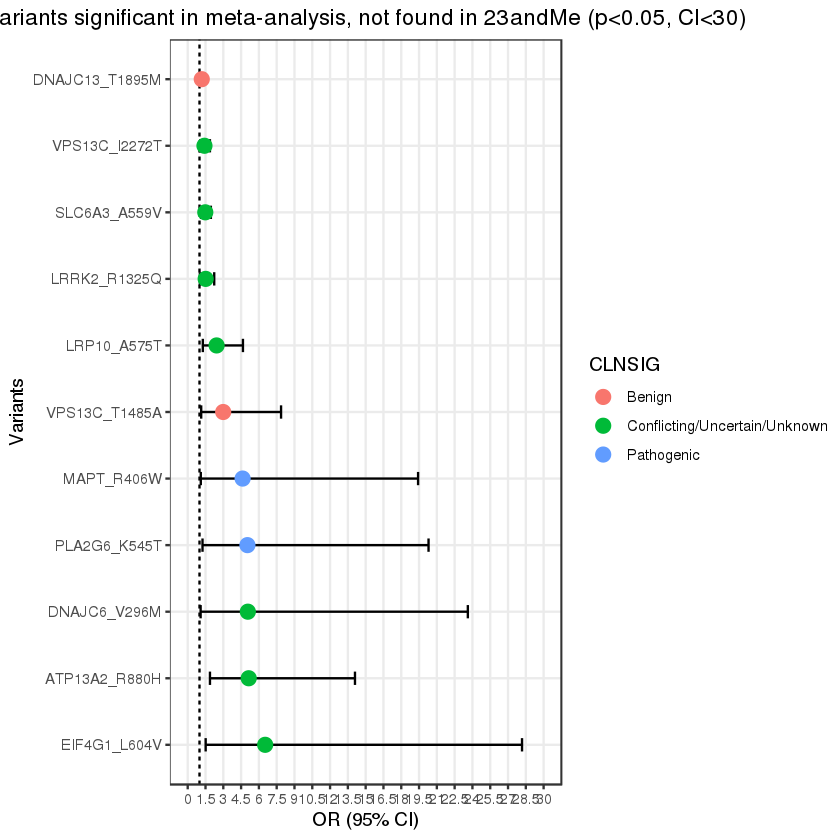

In [53]:
# plot these in forest plot
Onlymeta$CLNSIG[Onlymeta$CLNSIG == "Likely_pathogenic"] <- "Pathogenic"
Onlymeta$CLNSIG[Onlymeta$CLNSIG == "Pathogenic/Likely_pathogenic"] <- "Pathogenic"
Onlymeta$CLNSIG[Onlymeta$CLNSIG == "Likely_benign"] <- "Benign"
Onlymeta$CLNSIG[Onlymeta$CLNSIG == "Benign/Likely_benign"] <- "Benign"
Onlymeta$CLNSIG[Onlymeta$CLNSIG == "Uncertain_significance"] <- "Conflicting/Uncertain/Unknown"
Onlymeta$CLNSIG[Onlymeta$CLNSIG == "Conflicting_interpretations_of_pathogenicity"] <- "Conflicting/Uncertain/Unknown"
Onlymeta$CLNSIG[Onlymeta$CLNSIG == "."] <- "Conflicting/Uncertain/Unknown"
Onlymeta$CLNSIG[Onlymeta$CLNSIG == "Conflicting_interpretations_of_pathogenicity|_risk_factor"] <- "Conflicting/Uncertain/Unknown"
Onlymeta$CLNSIG[Onlymeta$CLNSIG == "Pathogenic/Likely_pathogenic|_risk_factor"] <- "Pathogenic/Risk_factor"
Onlymeta$CLNSIG[Onlymeta$CLNSIG == "Pathogenic|_risk_factor"] <- "Pathogenic/Risk_factor"  
Onlymeta$CLNSIG[Onlymeta$CLNSIG == "risk_factor"] <- "Risk_factor"

Meta12 = ggplot(Onlymeta, mapping = aes(x= OR, y = reorder(VariantName, -OR)))+
  geom_vline(aes(xintercept =1), size = .5, linetype = "dashed")+
  geom_errorbarh(aes(xmax = U95, xmin = L95), size = .5, height = .2) +
  geom_point(size = 3.5, aes(color = CLNSIG)) +
  scale_x_continuous(breaks = seq(0,30,1.5), labels = seq(0,30,1.5), limits = c(0,30)) +
  theme_bw()+
  theme(panel.grid.minor = element_blank())+
  ylab("Variants")+
  xlab("OR (95% CI)")+
  ggtitle("Variants significant in meta-analysis, not found in 23andMe (p<0.05, CI<30)")+
  theme(plot.title = element_text(hjust=0.5))

Meta12
# ggsave("./Plots_Manuscript/Forest_plot_11variants_p0.05_CI30_in_meta_not_present_23andMe_CLNSIG_shape.png", Meta12, width = 13, height = 8, dpi=300, units = "in")

In [83]:
# write file with 11 variants
colnames(Onlymeta)
Onlymeta_table = Onlymeta %>% select(MarkerName, Ref, Alt, avsnp150, VariantName, CLNDN, CLNSIG, MAF_23, MAF_NFE, Power_at_alpha005_OR2, Power_at_alpha005_OR3, Effect, StdErr, L95, OR, U95, `P-value`)

write.table(Onlymeta_table, "./Tables_Manuscript/Table_11variants_p0.05_CI30_in_meta_not_present_23andMe.txt", quote=F, sep = "\t", row.names = F)

[1] "MarkerName"            "Allele1"               "Allele2"              
 [4] "Freq1"                 "FreqSE"                "MinFreq"              
 [7] "MaxFreq"               "Effect"                "StdErr"               
[10] "P-value"               "Direction"             "HetISq"               
[13] "HetChiSq"              "HetDf"                 "HetPVal"              
[16] "End"                   "Ref"                   "Alt"                  
[19] "Func.refGene"          "Gene"                  "GeneDetail.refGene"   
[22] "ExonicFunc.refGene"    "AAChange"              "avsnp150"             
[25] "CLNALLELEID"           "CLNDN"                 "CLNDISDB"             
[28] "CLNREVSTAT"            "CLNSIG"                "AF"                   
[31] "AF_popmax"             "AF_male"               "AF_female"            
[34] "AF_raw"                "AF_afr"                "AF_sas"               
[37] "AF_amr"                "AF_eas"                "AF_nfe"               
[40] "AF_fin"                "AF_asj"                "AF_oth"               
[43] "non_topmed_AF_popmax"  "non_neuro_AF_popmax"   "non_cancer_AF_popmax" 
[46] "controls_AF_popmax"    "VariantName"           "CHR.BP"               
[49] "MAF_23"                "MAF_NFE"               "Power_at_alpha005_OR2"
[52] "Power_at_alpha005_OR3" "Effectv2"              "OR"                   
[55] "L95"                   "U95"                   "CI_range"             
[58] "EnoughPower"

In [137]:
# clinical significance of those
Onlymeta %>% group_by(CLNSIG) %>% tally() %>% mutate(perc=n/sum(n)*100)

CLNSIG,n,perc
<chr>,<int>,<dbl>
Benign,2,18.18182
Conflicting/Uncertain/Unknown,7,63.63636
Pathogenic,2,18.18182


In [142]:
# Association with PD?
Onlymeta %>% group_by(grepl("arkinson", CLNDN)) %>% tally()
Onlymeta %>% group_by(grepl("arkinson", CLNDN)) %>% arrange(-OR) %>% select(VariantName, OR, avsnp150) 

"grepl(""arkinson"", CLNDN)",n
<lgl>,<int>
FALSE,7
TRUE,4


Adding missing grouping variables: `grepl("arkinson", CLNDN)`


"grepl(""arkinson"", CLNDN)",VariantName,OR,avsnp150
<lgl>,<chr>,<dbl>,<chr>
FALSE,EIF4G1_L604V,6.529302,rs538505681
FALSE,ATP13A2_R880H,5.142298,rs564643512
FALSE,DNAJC6_V296M,5.069286,rs144323705
TRUE,PLA2G6_K545T,5.033422,rs121908681
TRUE,MAPT_R406W,4.627885,rs63750424
FALSE,VPS13C_T1485A,2.990977,rs8026956
FALSE,LRP10_A575T,2.435373,rs146141715
TRUE,LRRK2_R1325Q,1.513916,rs72546338
TRUE,SLC6A3_A559V,1.480974,rs28364997


In [147]:
# YES - previously associated with PD
Onlymeta %>% filter(grepl("arkinson", CLNDN)) %>% select(MarkerName, `P-value`, Effect, OR, CLNSIG, VariantName,avsnp150, Direction) %>% arrange(-OR)

MarkerName,P-value,Effect,OR,CLNSIG,VariantName,avsnp150,Direction
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr22:38120867,0.02313,-1.6161,5.033422,Pathogenic,PLA2G6_K545T,rs121908681,??-
chr17:46024061,0.03627,-1.5321,4.627885,Pathogenic,MAPT_R406W,rs63750424,?--
chr12:40308481,0.0367,0.4147,1.513916,Conflicting/Uncertain/Unknown,LRRK2_R1325Q,rs72546338,+++
chr5:1403013,0.005296,0.3927,1.480974,Conflicting/Uncertain/Unknown,SLC6A3_A559V,rs28364997,+++


In [148]:
# NO - not previously associated with PD
Onlymeta %>% filter(!grepl("arkinson", CLNDN)) %>% select(MarkerName, `P-value`, Effect, OR, CLNSIG, VariantName, avsnp150, CLNDN,Direction) %>% arrange(-OR)
Onlymeta12 = Onlymeta %>% filter(!grepl("arkinson", CLNDN))
dim(Onlymeta12)

MarkerName,P-value,Effect,OR,CLNSIG,VariantName,avsnp150,CLNDN,Direction
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr3:184322835,0.01191,1.8763,6.529302,Conflicting/Uncertain/Unknown,EIF4G1_L604V,rs538505681,.,?++
chr1:16988226,0.001463,1.6375,5.142298,Conflicting/Uncertain/Unknown,ATP13A2_R880H,rs564643512,"Kufor-Rakeb_syndrome|Spastic_paraplegia_78,_autosomal_recessive",+++
chr1:65386873,0.03866,1.6232,5.069286,Conflicting/Uncertain/Unknown,DNAJC6_V296M,rs144323705,.,+++
chr15:61951827,0.02641,-1.0956,2.990977,Benign,VPS13C_T1485A,rs8026956,not_provided,??-
chr14:22877108,0.007091,0.8901,2.435373,Conflicting/Uncertain/Unknown,LRP10_A575T,rs146141715,.,+++
chr15:61922557,0.01676,0.3444,1.411143,Conflicting/Uncertain/Unknown,VPS13C_I2272T,rs141890160,.,-++
chr3:132522838,0.04869,0.1692,1.184357,Benign,DNAJC13_T1895M,rs145242123,not_provided,+++


[1]  7 53

In [78]:
# are the significant ones in "23andMe only" replicated in meta-analysis
andme_0.05_CI_ID = andme_0.05_CI %>% separate(CHR.BP.REF.ALT, c("Chr", "BP", "REF", "ALT"), sep = ":") %>% unite("MarkerName", c("Chr", "BP"), sep = ":") %>% select(MarkerName, Gene, VariantName, pvalue) %>% rename("pvalue_23andMeONLY" = pvalue)
head(andme_0.05_CI_ID)

MarkerName,Gene,VariantName,pvalue_23andMeONLY
<chr>,<chr>,<chr>,<dbl>
chr1:155235196,GBA,GBA_R502C,8.495697e-08
chr1:155235843,GBA,GBA_N409S,3.085863e-44
chr1:155236376,GBA,GBA_E365K,1.024382e-19
chr1:155236384,GBA,GBA_T362I,8.702941e-03
chr1:155238215,GBA,GBA_N227S,4.171971e-02
chr1:16997107,ATP13A2,ATP13A2_R365W,1.604650e-02


In [79]:
meta3_check = meta3 %>% select(MarkerName, Gene, VariantName, `P-value`, Direction) %>% rename("pvalue_meta3" = `P-value`)
head(meta3_check)

MarkerName,Gene,VariantName,pvalue_meta3,Direction
<chr>,<chr>,<chr>,<chr>,<chr>
chr1:20638104,PINK1,PINK1_A217D,0.9565,??-
chr22:38112571,PLA2G6,PLA2G6_D737Y,0.6088,?++
chr3:195867623,TNK2,TNK2_R877H,0.3375,---
chr1:155235727,GBA,GBA_D448H,0.5723,?++
chr15:89318617,POLG,POLG_E1136K,0.07533,?++
chr2:232791124,GIGYF2,GIGYF2_D349E,0.4657,+-+


In [85]:
compare_p = left_join(meta3_check, andme_0.05_CI_ID)
head(compare_p)
dim(compare_p) #679
# this makes sense, since not all 23andMe ONLY variants were used, just want to see how many were sig in 23andMe and if they were replicated in meta-analysis

Joining, by = c("MarkerName", "Gene", "VariantName")


MarkerName,Gene,VariantName,pvalue_meta3,Direction,pvalue_23andMeONLY
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
chr1:20638104,PINK1,PINK1_A217D,0.9565,??-,NA
chr22:38112571,PLA2G6,PLA2G6_D737Y,0.6088,?++,NA
chr3:195867623,TNK2,TNK2_R877H,0.3375,---,NA
chr1:155235727,GBA,GBA_D448H,0.5723,?++,NA
chr15:89318617,POLG,POLG_E1136K,0.07533,?++,NA
chr2:232791124,GIGYF2,GIGYF2_D349E,0.4657,+-+,NA


[1] 679   6

In [88]:
# how many variants were significant in 23andMe (i.e. p<0.05 & CI<30)?
compare_p$pvalue_meta3 = as.numeric(compare_p$pvalue_meta3)
compare_p$pvalue_23andMeONLY = as.numeric(compare_p$pvalue_23andMeONLY)

compare_p %>% filter(!is.na(pvalue_23andMeONLY) & pvalue_meta3 <0.05) 
# 29 variants had no pvalue in 23andMeONLY but were significant in meta3

compare_p %>% filter(!is.na(pvalue_23andMeONLY) & pvalue_meta3 >0.05) 
# 2 variants were significant in 23andMeONLY but were not significant in meta3

MarkerName,Gene,VariantName,pvalue_meta3,Direction,pvalue_23andMeONLY
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
chr12:40322386,LRRK2,LRRK2_L1795F,1.553e-04,+?-,2.754135e-04
chr3:184322040,EIF4G1,EIF4G1_P486S,1.548e-02,+++,4.056793e-02
chr3:132516425,DNAJC13,DNAJC13_R1830H,1.227e-02,??+,3.862175e-02
chr6:161973403,PRKN,PRKN_K211N,6.756e-03,?++,4.613474e-02
chr1:155236384,GBA,GBA_T362I,3.759e-03,?-+,8.702941e-03
chr15:89321217,POLG,POLG_P881L,4.680e-02,+--,3.655286e-02
chr1:20648612,PINK1,PINK1_G411S,1.584e-02,---,1.558525e-02
chr1:155235843,GBA,GBA_N409S,3.305e-58,---,3.085863e-44
chr1:155236376,GBA,GBA_E365K,1.625e-10,++-,1.024382e-19


MarkerName,Gene,VariantName,pvalue_meta3,Direction,pvalue_23andMeONLY
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
chr2:232747740,GIGYF2,GIGYF2_N56S,0.5759,++-,0.04705674
chr1:16990276,ATP13A2,ATP13A2_Q750E,0.1585,--+,0.03663314


## 4. Power and variant lists

In [89]:
meta3_power %>% filter(Power_at_alpha005_OR2 > 0.8) %>% tally()

#n=162 variants with 80%+ power at OR2

n
<int>
162


In [98]:
# for pathogenic variants, consider higher OR
meta3_power %>% filter(CLNSIG == "Pathogenic" & Power_at_alpha005_OR3>0.8) %>% tally()
# 7
meta3_power %>% filter(CLNSIG == "Likely_pathogenic" & Power_at_alpha005_OR3>0.8) %>% tally()
# 1
meta3_power %>% filter(CLNSIG == "Pathogenic/Likely_pathogenic" & Power_at_alpha005_OR3>0.8) %>% tally()
# 2

n
<int>
7


n
<int>
1


n
<int>
2


In [100]:
# write that into column
meta3_power = meta3
meta3_power$EnoughPower[meta3_power$Power_at_alpha005_OR2>0.8] <- "YES"
meta3_power$EnoughPower[meta3_power$CLNSIG == "Pathogenic" & meta3_power$Power_at_alpha005_OR3>0.8] <- "YES"
meta3_power$EnoughPower[meta3_power$CLNSIG == "Likely_pathogenic" & meta3_power$Power_at_alpha005_OR3>0.8] <- "YES"
meta3_power$EnoughPower[meta3_power$CLNSIG == "Pathogenic/Likely_pathogenic" & meta3_power$Power_at_alpha005_OR3>0.8] <- "YES"

meta3_power %>% group_by(EnoughPower) %>% tally()
# overall, enough power for 166 variants, which excludes a certain amount of variants with no available frequencies, or frequencies too small to be calculated by available tools

EnoughPower,n
<chr>,<int>
YES,166
NA,513


### 4.1 Write actual list with p-value

In [102]:
# significant and enough power
meta3_power$`P-value` = as.numeric(meta3_power$`P-value`)
colnames(meta3_power)
# enough power + significant
meta3_power %>% filter(EnoughPower == "YES" & `P-value` <0.05) %>% tally() # 14 sig
power_sig = meta3_power %>% filter(EnoughPower == "YES" & `P-value` <0.05) %>% select(MarkerName, Ref, Alt,avsnp150, VariantName, CLNDN, CLNSIG, MAF_23, MAF_NFE, Power_at_alpha005_OR2, Power_at_alpha005_OR3, Effect, StdErr, L95, OR, U95, `P-value`)
#write.table(power_sig, "./Tables_Manuscript/15_variants_enough_power_and_significant_in_meta3.txt", row.names = F, sep = "\t", quote = F)

[1] "MarkerName"            "Allele1"               "Allele2"              
 [4] "Freq1"                 "FreqSE"                "MinFreq"              
 [7] "MaxFreq"               "Effect"                "StdErr"               
[10] "P-value"               "Direction"             "HetISq"               
[13] "HetChiSq"              "HetDf"                 "HetPVal"              
[16] "End"                   "Ref"                   "Alt"                  
[19] "Func.refGene"          "Gene"                  "GeneDetail.refGene"   
[22] "ExonicFunc.refGene"    "AAChange"              "avsnp150"             
[25] "CLNALLELEID"           "CLNDN"                 "CLNDISDB"             
[28] "CLNREVSTAT"            "CLNSIG"                "AF"                   
[31] "AF_popmax"             "AF_male"               "AF_female"            
[34] "AF_raw"                "AF_afr"                "AF_sas"               
[37] "AF_amr"                "AF_eas"                "AF_nfe"               
[40] "AF_fin"                "AF_asj"                "AF_oth"               
[43] "non_topmed_AF_popmax"  "non_neuro_AF_popmax"   "non_cancer_AF_popmax" 
[46] "controls_AF_popmax"    "VariantName"           "CHR.BP"               
[49] "MAF_23"                "MAF_NFE"               "Power_at_alpha005_OR2"
[52] "Power_at_alpha005_OR3" "Effectv2"              "OR"                   
[55] "L95"                   "U95"                   "EnoughPower"

n
<int>
15


In [1]:
# enough power + not significant
meta3_power %>% filter(EnoughPower == "YES" & `P-value` >0.05) %>% tally() # 157 not sig
power_notsig = meta3_power %>% filter(EnoughPower == "YES" & `P-value` >0.05)
#write.table(power_notsig, "./Tables_Manuscript/151_variants_enough_power_not_sig_in_meta3.txt", row.names = F, sep = "\t", quote = F)

ERROR: Error in meta3_power %>% filter(EnoughPower == "YES" & `P-value` > 0.05) %>% : could not find function "%>%"


In [8]:
power_notsig = fread("./Tables_Manuscript/151_variants_enough_power_not_sig_in_meta3.txt")

# which genes
power_notsig %>% group_by(Gene) %>% tally() %>% arrange(-n)

Gene,n
<chr>,<int>
VPS13C,29
POLG,24
DNAJC13,18
ATP13A2,13
EIF4G1,9
PLA2G6,9
GIGYF2,8
LRRK2,5
PRKN,5


In [27]:
# LRRK2
power_notsig %>% filter(Gene == "LRRK2") %>% select(VariantName, `P-value`, L95, OR, U95)
power_notsig %>% filter(grepl("arkinson", CLNDN) & Gene == "LRRK2") %>% select(VariantName, `P-value`, L95, OR, U95, CLNSIG)

VariantName,P-value,L95,OR,U95
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
LRRK2_R793M,0.8158,0.7022176,1.048856,1.566607
LRRK2_M1869T,0.5092,0.7519932,1.155808,1.776470
LRRK2_D2175H,0.2785,0.6404655,1.735161,4.700928
LRRK2_Y2346C,0.4411,0.4265388,1.736202,7.067113
LRRK2_L119P,0.8474,0.8594419,1.016637,1.202583


VariantName,P-value,L95,OR,U95,CLNSIG
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
LRRK2_R793M,0.8158,0.7022176,1.048856,1.566607,Conflicting_interpretations_of_pathogenicity
LRRK2_M1869T,0.5092,0.7519932,1.155808,1.776470,Uncertain_significance
LRRK2_D2175H,0.2785,0.6404655,1.735161,4.700928,Uncertain_significance
LRRK2_L119P,0.8474,0.8594419,1.016637,1.202583,Conflicting_interpretations_of_pathogenicity


In [28]:
# PRKN
power_notsig %>% filter(Gene == "PRKN") %>% select(VariantName, `P-value`, L95, OR, U95)
power_notsig %>% filter(grepl("arkinson", CLNDN) & Gene == "PRKN") %>% select(VariantName, `P-value`, L95, OR, U95, CLNSIG)

VariantName,P-value,L95,OR,U95
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
PRKN_R256C,0.1059,0.9453122,1.303692,1.797937
PRKN_P37L,0.6559,0.7374507,1.093737,1.622156
PRKN_E310D,0.9247,0.6533933,1.021733,1.597717
PRKN_R402C,0.2428,0.9140555,1.141565,1.425702
PRKN_P437L,0.4797,0.9088747,1.055485,1.225744


[1] "MarkerName"            "Allele1"               "Allele2"              
 [4] "Freq1"                 "FreqSE"                "MinFreq"              
 [7] "MaxFreq"               "Effect"                "StdErr"               
[10] "P-value"               "Direction"             "HetISq"               
[13] "HetChiSq"              "HetDf"                 "HetPVal"              
[16] "End"                   "Ref"                   "Alt"                  
[19] "Func.refGene"          "Gene"                  "GeneDetail.refGene"   
[22] "ExonicFunc.refGene"    "AAChange"              "avsnp150"             
[25] "CLNALLELEID"           "CLNDN"                 "CLNDISDB"             
[28] "CLNREVSTAT"            "CLNSIG"                "AF"                   
[31] "AF_popmax"             "AF_male"               "AF_female"            
[34] "AF_raw"                "AF_afr"                "AF_sas"               
[37] "AF_amr"                "AF_eas"                "AF_nfe"               
[40] "AF_fin"                "AF_asj"                "AF_oth"               
[43] "non_topmed_AF_popmax"  "non_neuro_AF_popmax"   "non_cancer_AF_popmax" 
[46] "controls_AF_popmax"    "VariantName"           "CHR.BP"               
[49] "MAF_23"                "MAF_NFE"               "Power_at_alpha005_OR2"
[52] "Power_at_alpha005_OR3" "Effectv2"              "OR"                   
[55] "L95"                   "U95"                   "EnoughPower"

VariantName,P-value,L95,OR,U95,CLNSIG
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
PRKN_R256C,0.1059,0.9453122,1.303692,1.797937,Uncertain_significance
PRKN_P37L,0.6559,0.7374507,1.093737,1.622156,Conflicting_interpretations_of_pathogenicity
PRKN_E310D,0.9247,0.6533933,1.021733,1.597717,Uncertain_significance
PRKN_R402C,0.2428,0.9140555,1.141565,1.425702,Conflicting_interpretations_of_pathogenicity
PRKN_P437L,0.4797,0.9088747,1.055485,1.225744,Conflicting_interpretations_of_pathogenicity


In [26]:
# variants with OR >2
class(power_notsig$OR)
power_notsig %>% filter(OR>1.5) %>% select(VariantName, `P-value`, L95, OR, U95, CLNSIG) 

[1] "numeric"

VariantName,P-value,L95,OR,U95,CLNSIG
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
LRRK2_D2175H,0.2785,0.64046551,1.735161,4.700928,Uncertain_significance
ATP13A2_A154V,0.5271,0.09005236,3.148418,110.075225,Uncertain_significance
LRRK2_Y2346C,0.4411,0.42653878,1.736202,7.067113,.


# previously assoc with PD?
power_notsig %>% group_by(grepl("arkinson", CLNDN)) %>% tally()
35/151*100

# pathogenicity
power_notsig %>% filter(grepl("arkinson", CLNDN)) %>% group_by(CLNSIG) %>% tally()

power_notsig %>% filter(grepl("arkinson", CLNDN) & CLNSIG == "Pathogenic") %>% select(VariantName)

power_notsig %>% filter(grepl("arkinson", CLNDN) & CLNSIG == "risk_factor") %>% select(VariantName)

## 6. Annotation 874 variants

In [69]:
VOI = fread("874_23andMe_rare_variants_annotated_fullfile.txt")
VOI$CLNSIG[VOI$CLNSIG == "Likely_pathogenic"] <- "Pathogenic"
VOI$CLNSIG[VOI$CLNSIG == "Pathogenic/Likely_pathogenic"] <- "Pathogenic"
VOI$CLNSIG[VOI$CLNSIG == "Likely_benign"] <- "Benign"
VOI$CLNSIG[VOI$CLNSIG == "Benign/Likely_benign"] <- "Benign"
VOI$CLNSIG[VOI$CLNSIG == "Uncertain_significance"] <- "Conflicting/Uncertain/Unknown"
VOI$CLNSIG[VOI$CLNSIG == "Conflicting_interpretations_of_pathogenicity"] <- "Conflicting/Uncertain/Unknown"
VOI$CLNSIG[VOI$CLNSIG == "."] <- "Conflicting/Uncertain/Unknown"
              

VOI %>% group_by(CLNSIG) %>% tally() %>% mutate(perc = n/sum(n)*100)

CLNSIG,n,perc
<chr>,<int>,<dbl>
Benign,91,10.4118993
Conflicting/Uncertain/Unknown,643,73.5697941
Pathogenic,132,15.1029748
risk_factor,8,0.9153318


In [73]:
colnames(VOI)
VOI %>% group_by(Gene.refGene) %>% tally() %>% arrange(-n)

[1] "Chr"                  "Start"                "End"                 
 [4] "Ref"                  "Alt"                  "Func.refGene"        
 [7] "Gene.refGene"         "GeneDetail.refGene"   "ExonicFunc.refGene"  
[10] "AAChange.refGene"     "avsnp150"             "CLNALLELEID"         
[13] "CLNDN"                "CLNDISDB"             "CLNREVSTAT"          
[16] "CLNSIG"               "AF"                   "AF_popmax"           
[19] "AF_male"              "AF_female"            "AF_raw"              
[22] "AF_afr"               "AF_sas"               "AF_amr"              
[25] "AF_eas"               "AF_nfe"               "AF_fin"              
[28] "AF_asj"               "AF_oth"               "non_topmed_AF_popmax"
[31] "non_neuro_AF_popmax"  "non_cancer_AF_popmax" "controls_AF_popmax"

Gene.refGene,n
<chr>,<int>
GBA,103
LRRK2,102
VPS13C,101
POLG,97
PLA2G6,59
PINK1,48
PRKN,47
ATP13A2,41
DNAJC13,41
